# Table of Contents

1. [An√°lisis del comportamiento de los anuncios de Meta Ads de la Constructora Xiudad](#an√°lisis-del-comportamiento-de-los-anuncios-de-meta-ads-de-la-constructora-xiudad)  
    1.1 [CONTEXTO](#contexto)  
    1.2 [DESCRIPCI√ìN DE CAMPOS](#descripci√≥n-de-campos)  
    1.3 [An√°lisis inicial del Dataset](#an√°lisis-inicial-del-dataset)  
    1.4 [Informaci√≥n b√°sica de cada columna](#informaci√≥n-b√°sica-de-cada-columna)  
    1.5 [An√°lisis estad√≠stico inicial del dataset](#an√°lisis-estad√≠stico-inicial-del-dataset)  
    1.6 [Revisi√≥n de datos nulos por columna](#revisi√≥n-de-datos-nulos-por-columna)  
        1.6.1 [Imputaci√≥n de valores nulos](#imputaci√≥n-de-valores-nulos)  
    1.7 [Filtro por objetivo de campa√±a](#filtro-por-objetivo-de-campa√±a)  
        1.7.1 [Distribuci√≥n de Resultados por objetivo de campa√±a](#distribuci√≥n-de-resultados-por-objetivo-de-campa√±a)  
        1.7.2 [Boxplots de Resultados por objetivo de campa√±a](#boxplots-de-resultados-por-objetivo-de-campa√±a)  
    1.8 [Distribuci√≥n de m√©tricas de desempe√±o y costos por objetivo de campa√±a](#distribuci√≥n-de-m√©tricas-de-desempe√±o-y-costos-por-objetivo-de-campa√±a)  
        1.8.1 [Conclusiones sobre m√©tricas de desempe√±o y costos](#conclusiones-sobre-m√©tricas-de-desempe√±o-y-costos)  
    1.9 [Distribuci√≥n de variables categ√≥ricas por objetivo de campa√±a](#distribuci√≥n-de-variables-categ√≥ricas-por-objetivo-de-campa√±a)  
        1.9.1 [An√°lisis univariado de variables categ√≥ricas](#an√°lisis-univariado-de-variables-categ√≥ricas)  
    1.10 [An√°lisis Bivariado y correlaciones entre variables](#an√°lisis-bivariado-y-correlaciones-entre-variables)  
    1.11 [An√°lisis de correlaciones por objetivo](#an√°lisis-de-correlaciones-por-objetivo)  
    1.12 [Relaci√≥n entre variables categ√≥ricas y Resultados (Test de Kruskal-Wallis)](#relaci√≥n-entre-variables-categ√≥ricas-y-resultados-test-de-kruskal-wallis)  
        1.12.1 [Principales hallazgos](#principales-hallazgos)  
    1.13 [Selecci√≥n de variables por objetivo](#selecci√≥n-de-variables-por-objetivo)  
        1.13.1 [¬øPor qu√© mantener variables con multicolinealidad?](#por-qu√©-mantener-variables-con-multicolinealidad)  
        1.13.2 [Tratamiento de la multicolinealidad](#tratamiento-de-la-multicolinealidad)  
    1.14 [Relaci√≥n entre variables num√©ricas y Resultados](#relaci√≥n-entre-variables-num√©ricas-y-resultados)  
        1.14.1 [Conclusiones del an√°lisis bivariado de variables num√©ricas y Resultados](#conclusiones-del-an√°lisis-bivariado-de-variables-num√©ricas-y-resultados)  
    1.15 [An√°lisis Bivariado de variables categ√≥ricas y Resultados](#an√°lisis-bivariado-de-variables-categ√≥ricas-y-resultados)  
        1.15.1 [An√°lisis bivariado de variables categ√≥ricas y *Resultados*](#an√°lisis-bivariado-de-variables-categ√≥ricas-y-resultados)  
2. [Limpieza de datos](#limpieza-de-datos)  
    2.1 [Manejo de valores nulos restantes](#manejo-de-valores-nulos-restantes)  
    2.2 [Transformaci√≥n de la columna Mes](#transformaci√≥n-de-la-columna-mes)  
3. [Modelado Predictivo y Comparaci√≥n de Algoritmos por Objetivo de Campa√±a](#modelado-predictivo-y-comparaci√≥n-de-algoritmos-por-objetivo-de-campa√±a)  
    3.1 [Comparaci√≥n de modelos lineales vs. modelos avanzados](#comparaci√≥n-de-modelos-lineales-vs-modelos-avanzados)  
        3.1.1 [Modelos lineales (Ridge, Lasso y Regresi√≥n Lineal)](#modelos-lineales-ridge-lasso-y-regresi√≥n-lineal)  
        3.1.2 [Modelos avanzados (RandomForest, GradientBoosting y XGBoost)](#modelos-avanzados-randomforest-gradientboosting-y-xgboost)  
    3.2 [Importancia de variables con Random Forest](#importancia-de-variables-con-random-forest)  
        3.2.1 [Interpretaci√≥n de resultados de la importancia de variables](#interpretaci√≥n-de-resultados-de-la-importancia-de-variables)  
    3.3 [Conclusi√≥n General del Proyecto](#conclusi√≥n-general-del-proyecto)  
        3.3.1 [Principales hallazgos](#principales-hallazgos)  
        3.3.2 [Limitaciones](#limitaciones)  
        3.3.3 [Recomendaciones](#recomendaciones)  

# An√°lisis del comportamiento de los anuncios de Meta Ads de la Constructora Xiudad

In [104]:
# ================================
# Importaci√≥n de librer√≠as
# ================================

# Manejo y an√°lisis de datos
import pandas as pd
import numpy as np
import missingno as msno  # visualizaci√≥n de valores nulos

# Visualizaci√≥n
import matplotlib.pyplot as plt
import seaborn as sns

# Estad√≠stica
from scipy.stats import kruskal

# Modelado y m√©tricas
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    r2_score, mean_squared_error, mean_absolute_error
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# XGBoost
from xgboost import XGBRegressor

# Configuraci√≥n general
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Estilo de gr√°ficos
sns.set_theme(style="whitegrid")
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14


## CONTEXTO

El dataset utilizado en este an√°lisis proviene del portafolio de Meta Ads, donde se recopilan los registros de campa√±as digitales desarrolladas para el proyecto inmobiliario YOY Xplora, lanzado en mayo de 2024 por la Constructora Xiudad.

El proyecto tiene como objetivo la comercializaci√≥n de 640 lotes residenciales en Jamund√≠, siendo las campa√±as digitales la principal fuente de generaci√≥n de prospectos (leads).

El prop√≥sito del an√°lisis es evaluar el comportamiento de los anuncios de Meta Ads, con especial √©nfasis en la variable "Resultados", que refleja el estado alcanzado en cada interacci√≥n (por ejemplo: visita al sitio web, lead generado, conversaci√≥n con asesor, compra efectiva).

## DESCRIPCI√ìN DE CAMPOS
0. Nombre de la campa√±a: Nombre asignado a la campa√±a en Meta , (Tipo de variable = Categ√≥rica )
1. Identificador de la campa√±a: ID √∫nico de la campa√±a, (Tipo de variable = N√∫merica)
2. Nombre del conjunto de anuncios: Nombre asignado al conjunto de anuncios de la campa√±a en Meta Ads, (Tipo de variable = Categ√≥rica)
3. Identificador del conjunto de anuncios: ID √∫nico del conjunto de anuncios, (Tipo de variable = N√∫merica)
4. Nombre del anuncio: Nombre asignado al anuncio en el conjunto de anuncios en Meta Ads, (Tipo de variable = Categ√≥rica)
5. Identificador del anuncio: ID √∫nico del anuncio, (Tipo de variable = N√∫merica)
6. Mes: Per√≠odo de duraci√≥n del conjunto de anuncios/anuncio, (Tipo de variable = Categ√≥rica)
7. Objetivo: Objetivo de la campa√±a (ventas, clientes potenciales, mensajes, etc), (Tipo de variable = Categ√≥rica)
8. Edad: Rango de edades con las cuales se segment√≥ el conjunto de anuncios, (Tipo de variable = Categ√≥rica)
9. Sexo: Segmento de g√©nero para cada conjunto de anuncios, (Tipo de variable = Categ√≥rica)
10. Llamada a la acci√≥n: Bot√≥n usado para motivar al usuario a realizar una acci√≥n, (Tipo de variable = Categ√≥rica)
11. Tipo de resultado: Tipo de conversi√≥n medida, (Tipo de variable = Categ√≥rica)
12. Resultados: Cantidad de conversiones logradas, (Tipo de variable = N√∫merica)
13. Importe gastado (COP): Monto invertido en campa√±a/conjunto de anuncios/anuncios, (Tipo de variable = N√∫merica)
14. Alcance: Personas √∫nicas alcanzadas, (Tipo de variable = N√∫merica)
15. Impresiones: N√∫mero total de veces que se mostr√≥ un anuncio, (Tipo de variable = N√∫merica)
16. Costo por resultado: Costo promedio por conversi√≥n, (Tipo de variable = N√∫merica)
17. Clics en el enlace: N√∫mero de clic en el anuncio, (Tipo de variable = N√∫merica)
18. CPC (costo por clic en el enlace):Costo promedio por clic, (Tipo de variable = N√∫merica)
19. CPM (costo por mil impresiones): Costo promedio por mil impresiones, (Tipo de variable = N√∫merica)
20. CTR (todos): Porcentaje de clics sobre impresiones, (Tipo de variable = N√∫merica)
21. Conversaciones con mensajes iniciadas: Conversaciones de Whatsapp iniciadas, (Tipo de variable = N√∫merica)
22. Frecuencia: Promedio de veces que una persona vio el anuncio, (Tipo de variable = N√∫merica)
23. Inicio del informe: Fecha inicial del reporte, (Tipo de variable = Categ√≥rica)
24. Fin del informe: Fecha final del reporte, (Tipo de variable = Categ√≥rica)

## An√°lisis inicial del Dataset
Empezaremos viendo c√≥mo est√° estructurado el dataset

In [105]:
# =========================
# Carga del dataset
# =========================

# Cargamos los datos del reporte de campa√±as de Meta Ads
df_meta = pd.read_csv("REPORTE-XPLORA-MAYO-2024-AGOSTO-2025.csv")

# Mostramos todas las columnas completas en pantalla
pd.set_option("display.max_columns", None)

# Revisamos la dimensi√≥n del dataset (filas, columnas)
df_meta.shape

(2220, 25)

In [106]:
# Mostramos los primeros registros para hacernos una idea de la estructura
df_meta.head()

Nombre de la campa√±a  Identificador de la campa√±a  \
0  Xiudad | MAYO | INTERACCI√ìN - 13 MAYO 2024           120208939348690362   
1  Xiudad | MAYO | INTERACCI√ìN - 13 MAYO 2024           120208939348690362   
2  Xiudad | MAYO | INTERACCI√ìN - 13 MAYO 2024           120208939348690362   
3  Xiudad | MAYO | INTERACCI√ìN - 13 MAYO 2024           120208939348690362   
4  Xiudad | MAYO | INTERACCI√ìN - 13 MAYO 2024           120208939348690362   

       Nombre del conjunto de anuncios  \
0  Xiudad | MAYO | INTERACCI√ìN - PIEZA   
1  Xiudad | MAYO | INTERACCI√ìN - PIEZA   
2  Xiudad | MAYO | INTERACCI√ìN - PIEZA   
3  Xiudad | MAYO | INTERACCI√ìN - PIEZA   
4  Xiudad | MAYO | INTERACCI√ìN - PIEZA   

   Identificador del conjunto de anuncios  \
0                      120209021784370362   
1                      120209021784370362   
2                      120209021784370362   
3                      120209021784370362   
4                      120209021784370362   

                    Nombre del anuncio  Identificador del anuncio  \
0  Xiudad | MAYO | INTERACCI√ìN - PIEZA         120209056012500362   
1  Xiudad | MAYO | INTERACCI√ìN - PIEZA         120209056012500362   
2  Xiudad | MAYO | INTERACCI√ìN - PIEZA         120209056012500362   
3  Xiudad | MAYO | INTERACCI√ìN - PIEZA         120209056012500362   
4  Xiudad | MAYO | INTERACCI√ìN - PIEZA         120209056012500362   

                       Mes            Objetivo   Edad  Sexo  \
0  2024-05-03 - 2024-05-31  OUTCOME_ENGAGEMENT  55-64  male   
1  2024-06-01 - 2024-06-30  OUTCOME_ENGAGEMENT  35-44  male   
2  2024-05-03 - 2024-05-31  OUTCOME_ENGAGEMENT  25-34  male   
3  2024-05-03 - 2024-05-31  OUTCOME_ENGAGEMENT  35-44  male   
4  2024-05-03 - 2024-05-31  OUTCOME_ENGAGEMENT  45-54  male   

  Llamada a la acci√≥n Tipo de resultado  Resultados  Importe gastado (COP)  \
0    WHATSAPP_MESSAGE               NaN         NaN                     26   
1    WHATSAPP_MESSAGE               NaN         NaN                   9581   
2    WHATSAPP_MESSAGE               NaN         NaN                    935   
3    WHATSAPP_MESSAGE               NaN         NaN                    983   
4    WHATSAPP_MESSAGE               NaN         NaN                    866   

   Alcance  Impresiones  Costo por resultado  Clics en el enlace  \
0      NaN            6                  NaN                 NaN   
1      NaN          794                  NaN                 5.0   
2      NaN           86                  NaN                 1.0   
3      NaN           71                  NaN                 2.0   
4      NaN           42                  NaN                 2.0   

   CPC (costo por clic en el enlace)  CPM (costo por mil impresiones)  \
0                                NaN                      4333.333333   
1                             1916.2                     12066.750630   
2                              935.0                     10872.093023   
3                              491.5                     13845.070423   
4                              433.0                     20619.047619   

   CTR (todos)  Conversaciones con mensajes iniciadas  Frecuencia  \
0     0.000000                                    NaN         NaN   
1     1.763224                                    NaN         NaN   
2     1.162791                                    NaN         NaN   
3     5.633803                                    NaN         NaN   
4     7.142857                                    NaN         NaN   

  Inicio del informe Fin del informe  
0         2024-05-03      2024-05-31  
1         2024-06-01      2024-06-30  
2         2024-05-03      2024-05-31  
3         2024-05-03      2024-05-31  
4         2024-05-03      2024-05-31

En esta parte lo que hago es cargar el dataset de Meta Ads y verificar cu√°ntos registros y variables contiene.
Cada fila corresponde a un anuncio o interacci√≥n dentro de una campa√±a, y entre las columnas m√°s importantes est√°n:

Nombre de la campa√±a y del anuncio.

Objetivo de la campa√±a.

Segmentaci√≥n de edad y sexo.

El mes de ejecuci√≥n.

La variable de resultados, que muestra qu√© acci√≥n se logr√≥ (visita, lead, conversaci√≥n, etc.).

Con esto ya tengo una primera idea de la informaci√≥n que voy a analizar y me aseguro de que los datos se hayan cargado correctamente.

## Informaci√≥n b√°sica de cada columna
Se observa informaci√≥n b√°sica sobre cada columna como √≠ndice, nombre, cantidad de no nulos, tipo de dato

In [107]:
# =========================
# Exploraci√≥n general del dataset
# =========================

# Informaci√≥n general: n√∫mero de registros, columnas, valores no nulos y tipo de dato
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Nombre de la campa√±a                    2220 non-null   object 
 1   Identificador de la campa√±a             2220 non-null   int64  
 2   Nombre del conjunto de anuncios         2220 non-null   object 
 3   Identificador del conjunto de anuncios  2220 non-null   int64  
 4   Nombre del anuncio                      2220 non-null   object 
 5   Identificador del anuncio               2220 non-null   int64  
 6   Mes                                     2220 non-null   object 
 7   Objetivo                                2220 non-null   object 
 8   Edad                                    2220 non-null   object 
 9   Sexo                                    2220 non-null   object 
 10  Llamada a la acci√≥n                     2220 non-null   o

Con este comando revisamos la estructura del dataset:

Tenemos 25 columnas en total.

La mayor√≠a de las variables est√°n completas, pero hay algunas columnas con muchos valores nulos.

Los tipos de datos son en su mayor√≠a object (texto) y float64 (n√∫meros con decimales).

Al revisar con m√°s detalle encontramos lo siguiente:

Alcance aparece vac√≠o, pero esto es normal porque cuando el objetivo de la campa√±a es de reconocimiento, ese valor ya est√° reflejado en la columna Resultados. Por eso esta columna es redundante.

Conversaciones con mensajes iniciadas tambi√©n aparece vac√≠a, ya que ninguna campa√±a tuvo ese objetivo espec√≠fico.

Frecuencia no trae datos porque en realidad es un c√°lculo que se obtiene a partir de otras columnas (Impresiones / Alcance).

Esto nos ayuda a decidir qu√© columnas s√≠ son √∫tiles y cu√°les podr√≠amos descartar o tratar de otra manera en el an√°lisis.

## An√°lisis estad√≠stico inicial del dataset

In [108]:
# =========================
# Estad√≠stica descriptiva
# =========================

# Resumen estad√≠stico de las variables num√©ricas
df_meta.describe()

Identificador de la campa√±a  Identificador del conjunto de anuncios  \
count                 2.220000e+03                            2.220000e+03   
mean                  1.202129e+17                            1.202129e+17   
std                   2.850898e+12                            2.844071e+12   
min                   1.202089e+17                            1.202090e+17   
25%                   1.202108e+17                            1.202108e+17   
50%                   1.202128e+17                            1.202128e+17   
75%                   1.202147e+17                            1.202147e+17   
max                   1.202253e+17                            1.202253e+17   

       Identificador del anuncio     Resultados  Importe gastado (COP)  \
count               2.220000e+03     945.000000           2.220000e+03   
mean                1.202130e+17    3132.437037           5.321890e+04   
std                 2.869186e+12   10872.437242           1.384968e+05   
min                 1.202091e+17       1.000000           0.000000e+00   
25%                 1.202108e+17       2.000000           5.457500e+02   
50%                 1.202130e+17      10.000000           6.385000e+03   
75%                 1.202147e+17      81.000000           3.339200e+04   
max                 1.202253e+17  153713.000000           1.775294e+06   

       Alcance    Impresiones  Costo por resultado  Clics en el enlace  \
count      0.0    2220.000000           945.000000         1610.000000   
mean       NaN    8427.134234          8611.179909           87.513043   
std        NaN   22194.363144         10953.707613          278.117998   
min        NaN       0.000000             0.000000            1.000000   
25%        NaN      60.000000          1267.500000            4.000000   
50%        NaN     593.500000          6134.000000           17.000000   
75%        NaN    5261.000000         10896.666667           57.000000   
max        NaN  260652.000000        104150.000000         6729.000000   

       CPC (costo por clic en el enlace)  CPM (costo por mil impresiones)  \
count                        1610.000000                     2.218000e+03   
mean                         1250.976298                     1.319606e+04   
std                          1191.727800                     5.142396e+04   
min                            11.000000                     0.000000e+00   
25%                           550.141129                     5.817939e+03   
50%                          1003.891304                     9.466273e+03   
75%                          1558.076230                     1.446128e+04   
max                         17947.000000                     2.243375e+06   

       CTR (todos)  Conversaciones con mensajes iniciadas  Frecuencia  
count  2218.000000                                    0.0         0.0  
mean      2.479121                                    NaN         NaN  
std       6.280554                                    NaN         NaN  
min       0.000000                                    NaN         NaN  
25%       0.152860                                    NaN         NaN  
50%       1.479588                                    NaN         NaN  
75%       2.990636                                    NaN         NaN  
max     200.000000                                    NaN         NaN

## An√°lisis estad√≠stico inicial del dataset

Del an√°lisis estad√≠stico inicial (`df.describe()`) se observa que:

- **Identificadores de campa√±a, conjunto de anuncios e identificador del anuncio**  
  Aparecen en el resumen estad√≠stico, pero no son variables √∫tiles para el an√°lisis exploratorio, ya que solo funcionan como llaves de identificaci√≥n.  

- **Variables num√©ricas relevantes (`Resultados`, `Importe gastado (COP)`, `Impresiones`, `Clics en el enlace`, `CPC`, `CPM`, `CTR`)**  
  Muestran **grandes diferencias entre los valores m√≠nimos y m√°ximos**, as√≠ como desviaciones est√°ndar muy elevadas en relaci√≥n con la media.  
  Esto indica que el dataset tiene **alta dispersi√≥n** y posiblemente **outliers**, lo cual ser√° analizado m√°s adelante.  

**Ejemplos concretos:**  
- `Resultados` var√≠a entre 1 y 153.713.  
- `Importe gastado (COP)` va desde 0 hasta m√°s de 1,7 millones.  
- `Impresiones` oscilan desde 38 hasta m√°s de 260.000.  

Estos rangos tan amplios sugieren comportamientos muy heterog√©neos entre las distintas campa√±as.  

**Interpretaci√≥n adicional:**  
- La gran variabilidad observada se debe a que en este resumen se est√°n incluyendo anuncios de **todos los objetivos de campa√±a**.  
- Las campa√±as de **Reconocimiento** suelen tener m√©tricas naturalmente m√°s altas, mientras que las de **clientes potenciales** o **ventas** tienden a mostrar vol√∫menes m√°s bajos.  
- Muchos anuncios presentan valores muy bajos en la variable `Resultados` (1 o 2), lo que refleja pruebas iniciales o anuncios de bajo rendimiento.  

**Conclusi√≥n:**  
Esta variabilidad confirma tanto la existencia de **outliers** como de diferentes comportamientos seg√∫n el objetivo de campa√±a. La dispersi√≥n en los datos no solo refleja m√©tricas extremas, sino tambi√©n la din√°mica propia de las campa√±as publicitarias en Meta Ads.  

## Revisi√≥n de datos nulos por columna

In [109]:
# =========================
# Revisi√≥n de valores nulos
# =========================

df_meta.isnull().sum()

Nombre de la campa√±a                         0
Identificador de la campa√±a                  0
Nombre del conjunto de anuncios              0
Identificador del conjunto de anuncios       0
Nombre del anuncio                           0
Identificador del anuncio                    0
Mes                                          0
Objetivo                                     0
Edad                                         0
Sexo                                         0
Llamada a la acci√≥n                          0
Tipo de resultado                         1275
Resultados                                1275
Importe gastado (COP)                        0
Alcance                                   2220
Impresiones                                  0
Costo por resultado                       1275
Clics en el enlace                         610
CPC (costo por clic en el enlace)          610
CPM (costo por mil impresiones)              2
CTR (todos)                                  2
Conversaci


Por conocimiento y l√≥gica de c√≥mo funciona Meta Ads, tomo las siguientes decisiones sobre los valores nulos:

- En la columna **`Resultados`** y **`Clics en el enlace`**, los nulos se pueden imputar con **0**, ya que representan que el anuncio no gener√≥ interacci√≥n.  

- En las columnas de **`Costo por resultado`** y **`CPC (costo por clic en el enlace)`** no se deben imputar ceros.  
  Hacerlo podr√≠a interpretarse como que hubo resultados "gratis", lo cual no tendr√≠a sentido en este contexto.  

- La columna **`Tipo de resultado`** se puede completar usando el **objetivo de la campa√±a**, de esa manera se asigna un tipo coherente en lugar de dejarlo nulo.  

- Las columnas **`CPM`** y **`CTR`** tienen muy pocos valores nulos. Por ahora los dejo tal cual, ya que no afectan el an√°lisis general y se pueden tratar m√°s adelante si es necesario.  

- Finalmente, las columnas **`Alcance`**, **`Frecuencia`** y **`Conversaciones con mensajes iniciadas`** se eliminan porque todos sus valores est√°n en nulo, as√≠ que no aportan nada al an√°lisis. 

In [110]:
# Distribuci√≥n del tipo de resultado por objetivo de campa√±a
df_meta.groupby('Objetivo')['Tipo de resultado'].value_counts(dropna=False)

Objetivo            Tipo de resultado           
LINK_CLICKS         Clics en el enlace               38
                    NaN                               4
OUTCOME_AWARENESS   Alcance                         194
                    NaN                              22
OUTCOME_ENGAGEMENT  NaN                             253
OUTCOME_LEADS       Clientes potenciales de Meta    713
                    NaN                             614
OUTCOME_SALES       NaN                             382
Name: count, dtype: int64

### Imputaci√≥n de valores nulos

In [111]:
# =========================
# Imputaci√≥n de valores nulos
# =========================

# Reemplazo de nulos en Resultados y Clics en el enlace por 0
df_meta.loc[:, 'Resultados'] = df_meta['Resultados'].fillna(0)
df_meta.loc[:, 'Clics en el enlace'] = df_meta['Clics en el enlace'].fillna(0)

# Imputaci√≥n de Tipo de resultado seg√∫n el objetivo de la campa√±a
df_meta['Tipo de resultado'] = np.where(
    (df_meta['Objetivo'] == 'LINK_CLICKS') & (df_meta['Tipo de resultado'].isna()),
    'Clics en el enlace',
    np.where(
        (df_meta['Objetivo'] == 'OUTCOME_AWARENESS') & (df_meta['Tipo de resultado'].isna()),
        'Alcance',
        np.where(
            (df_meta['Objetivo'] == 'OUTCOME_LEADS') & (df_meta['Tipo de resultado'].isna()),
            'Clientes potenciales de Meta',
            np.where(
                (df_meta['Objetivo'] == 'OUTCOME_ENGAGEMENT') & (df_meta['Tipo de resultado'].isna()),
                'Interacciones',
                np.where(
                    (df_meta['Objetivo'] == 'OUTCOME_SALES') & (df_meta['Tipo de resultado'].isna()),
                    'Ventas',
                    df_meta['Tipo de resultado']
                )
            )
        )
    )
)

# Verificamos nuevamente los valores nulos despu√©s de la imputaci√≥n
df_meta.isnull().sum()

Nombre de la campa√±a                         0
Identificador de la campa√±a                  0
Nombre del conjunto de anuncios              0
Identificador del conjunto de anuncios       0
Nombre del anuncio                           0
Identificador del anuncio                    0
Mes                                          0
Objetivo                                     0
Edad                                         0
Sexo                                         0
Llamada a la acci√≥n                          0
Tipo de resultado                            0
Resultados                                   0
Importe gastado (COP)                        0
Alcance                                   2220
Impresiones                                  0
Costo por resultado                       1275
Clics en el enlace                           0
CPC (costo por clic en el enlace)          610
CPM (costo por mil impresiones)              2
CTR (todos)                                  2
Conversaci

## Filtro por objetivo de campa√±a

Primero revisar los valores que tiene la columna de Objetivo

In [112]:
# =========================
# Filtro por objetivo de campa√±a
# =========================

# Revisar los valores √∫nicos de la columna 'Objetivo'
df_meta['Objetivo'].unique()

array(['OUTCOME_ENGAGEMENT', 'OUTCOME_LEADS', 'OUTCOME_SALES',
       'OUTCOME_AWARENESS', 'LINK_CLICKS'], dtype=object)

In [113]:
# Contar cu√°ntos registros tiene cada objetivo de campa√±a
df_meta['Objetivo'].value_counts()

Objetivo
OUTCOME_LEADS         1327
OUTCOME_SALES          382
OUTCOME_ENGAGEMENT     253
OUTCOME_AWARENESS      216
LINK_CLICKS             42
Name: count, dtype: int64

Una vez identificados estos valores, se generan los datasets filtrados, pero primero vamos a eliminar las 3 columnas que no tienen datos

In [114]:
# Eliminar columnas que no tienen datos
df_meta = df_meta.drop(columns=['Alcance', 'Conversaciones con mensajes iniciadas', 'Frecuencia'],
                       errors='ignore')

Creamos un dataset filtrado por objetivo de campa√±a y los guardamos en un diccionario para poder facilitar la creaci√≥n de gr√°ficas

In [115]:
# Crear datasets filtrados por cada objetivo y guardarlos en un diccionario
df_interaccion = df_meta[df_meta['Objetivo'] == 'OUTCOME_ENGAGEMENT']
df_leads = df_meta[df_meta['Objetivo'] == 'OUTCOME_LEADS']
df_ventas = df_meta[df_meta['Objetivo'] == 'OUTCOME_SALES']
df_reconocimiento = df_meta[df_meta['Objetivo'] == 'OUTCOME_AWARENESS']
df_clicks = df_meta[df_meta['Objetivo'] == 'LINK_CLICKS']

dfs = {
    'Interacci√≥n': df_interaccion,
    'Clientes potenciales': df_leads,
    'Ventas': df_ventas,
    'Reconocimiento': df_reconocimiento,
    'Clics en enlace': df_clicks
}

Creamos el histograma de la variable 'Resultados' para cada dataset filtrado

### Distribuci√≥n de Resultados por objetivo de campa√±a

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


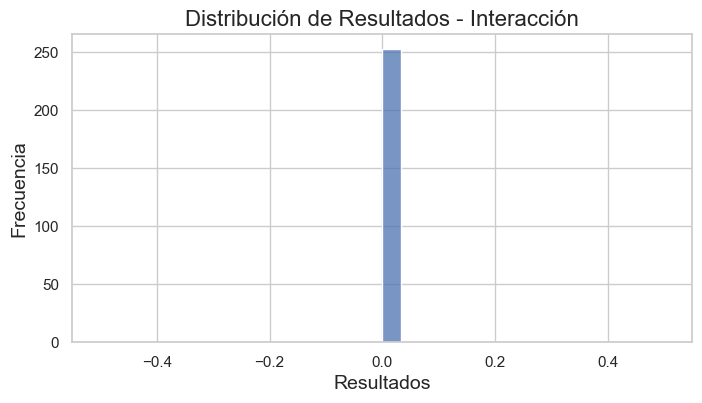

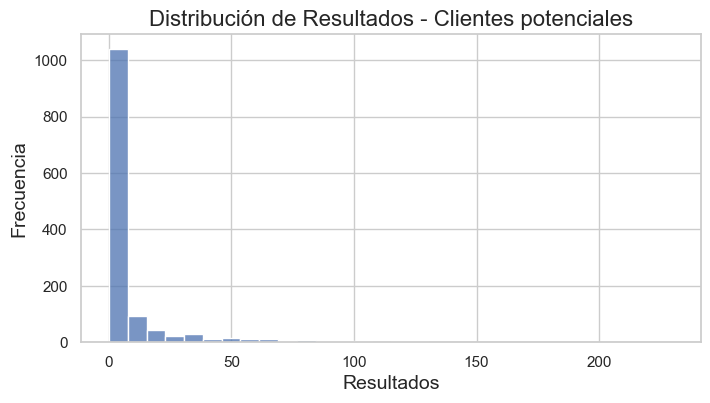

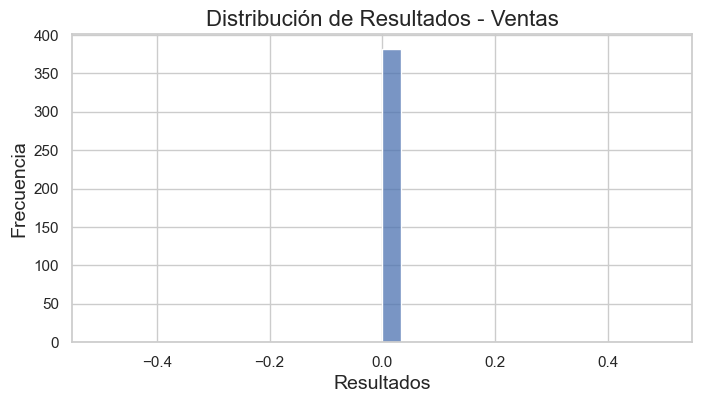

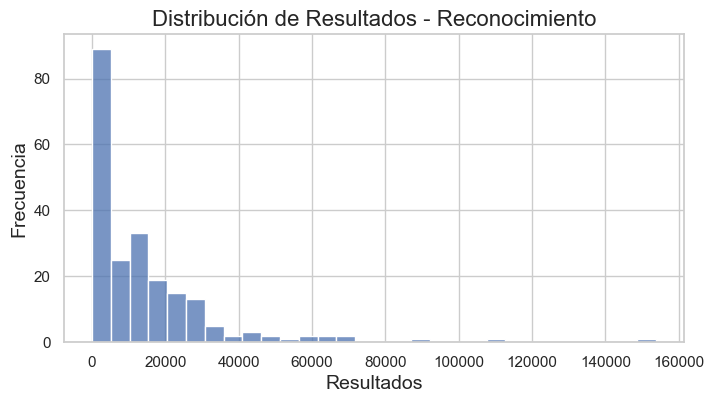

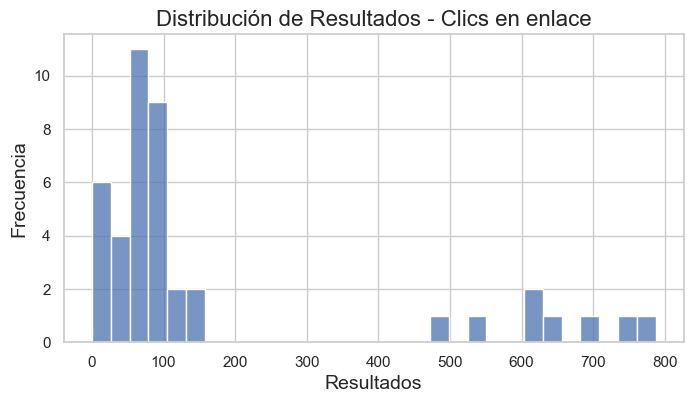

In [136]:
# =========================
# Distribuci√≥n de Resultados por objetivo de campa√±a
# =========================

# Histograma de la variable 'Resultados' para cada dataset filtrado
for objetivo, df in dfs.items():
    plt.figure(figsize=(8,4))
    sns.histplot(df['Resultados'], bins=30, kde=False)
    plt.title(f"Distribuci√≥n de Resultados - {objetivo}")
    plt.xlabel("Resultados")
    plt.ylabel("Frecuencia")
    plt.show()

Al analizar la variable **`Resultados`** segmentada por objetivo de campa√±a, se observan patrones de distribuci√≥n distintos:

- **Clientes potenciales (OUTCOME_LEADS):**  
  La distribuci√≥n es **sesgada positivamente (a la derecha)**, con la mayor√≠a de anuncios generando entre 0 y 10 resultados.  
  Pocos anuncios alcanzan valores altos (cola larga hasta ~200).  
  Esto refleja la din√°mica t√≠pica de campa√±as de prueba: se lanzan muchos anuncios, la mayor√≠a rinde poco, y solo unos pocos concentran la mayor parte de las conversiones.  

- **Reconocimiento (OUTCOME_AWARENESS):**  
  Tambi√©n muestra una **distribuci√≥n sesgada positivamente**, pero con una **escala mucho mayor**.  
  Algunos anuncios superan los **150.000 resultados**, lo cual es coherente con el objetivo de maximizar **alcance e impresiones**.  
  Existe una gran dispersi√≥n entre anuncios, lo que indica variabilidad significativa en su rendimiento.  

- **Clics en enlace (LINK_CLICKS):**  
  Aunque mantiene el sesgo positivo, la forma es distinta:  
  hay una **concentraci√≥n de anuncios en un rango medio (50‚Äì150 clics)**, con algunos picos aislados de 500 a 800 clics.  
  Esto sugiere un comportamiento m√°s homog√©neo que en Leads o Reconocimiento, aunque todav√≠a aparecen outliers.  

- **Interacci√≥n (OUTCOME_ENGAGEMENT) y Ventas (OUTCOME_SALES):**  
  Los histogramas aparecen pr√°cticamente vac√≠os, lo que evidencia que **no existen resultados registrados en estas m√©tricas**.  
  Aunque se mantienen en la exploraci√≥n, en realidad no aportan informaci√≥n √∫til para el an√°lisis.  

Se crea un nuevo diccionario excluyendo los objetivos de Interacci√≥n y ventas. Posteriormente se generan los boxplots de la variable resultado

### Boxplots de Resultados por objetivo de campa√±a

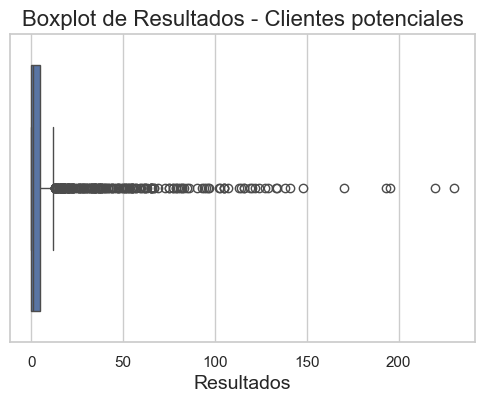

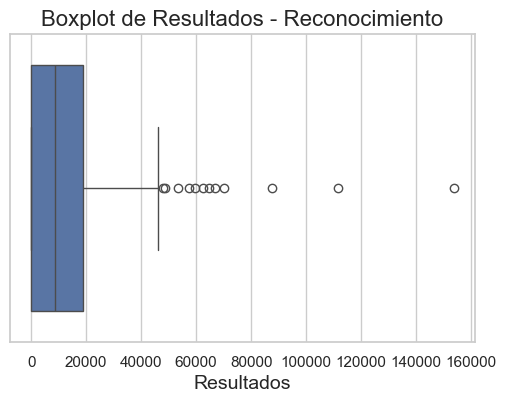

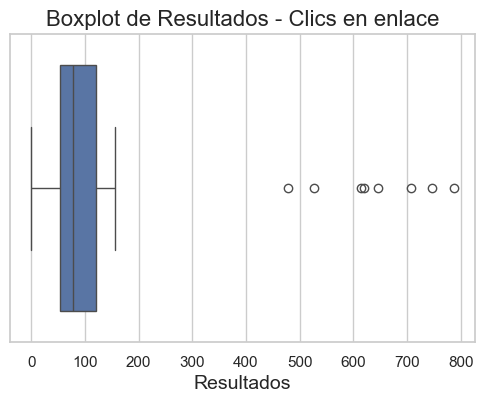

In [137]:
# =========================
# Boxplots de Resultados por objetivo de campa√±a
# =========================

# Crear un nuevo diccionario excluyendo Interacci√≥n y Ventas
dfs1 = {
    'Clientes potenciales': df_leads,
    'Reconocimiento': df_reconocimiento,
    'Clics en enlace': df_clicks
}

# Generar boxplots para la variable 'Resultados'
for objetivo, df in dfs1.items():
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['Resultados'])
    plt.title(f"Boxplot de Resultados - {objetivo}")
    plt.xlabel("Resultados")
    plt.show()


En los boxplots de la variable **`Resultados`** se observan patrones claros y diferenciados entre objetivos:

- **Leads (OUTCOME_LEADS):**  
  Es el objetivo con m√°s anuncios. La mayor√≠a generan menos de 10 leads, lo que se refleja en una mediana baja.  
  Sin embargo, existen algunos anuncios que superan los 200 leads, funcionando como outliers.  
  Esto confirma que este tipo de campa√±as requiere lanzar muchos anuncios, de los cuales solo unos pocos destacan.  

- **Reconocimiento (OUTCOME_AWARENESS):**  
  La escala de resultados es mucho mayor.  
  La mayor√≠a de anuncios genera decenas de miles de impresiones, pero tambi√©n aparecen outliers que superan los 100.000.  
  Este comportamiento es esperable porque se trata de un objetivo dise√±ado para maximizar alcance de forma masiva.  

- **Clics en enlace (LINK_CLICKS):**  
  Se ubica en un punto intermedio.  
  La mayor√≠a de anuncios generan decenas de clics, aunque hay casos at√≠picos que llegan a varios cientos.  
  Esto muestra un comportamiento m√°s estable que en leads o reconocimiento, aunque a√∫n con algunos valores extremos.  

## Distribuci√≥n de m√©tricas de desempe√±o y costos por objetivo de campa√±a


Adem√°s de analizar la variable **`Resultados`**, es importante revisar c√≥mo se comportan otras m√©tricas
relacionadas con el desempe√±o y los costos de las campa√±as.

Las variables que analizo aqu√≠ son:

- **Importe gastado (COP):** inversi√≥n total en cada anuncio.  
- **Impresiones:** cantidad de veces que los anuncios fueron mostrados.  
- **Costo por resultado:** eficiencia de la inversi√≥n medida en funci√≥n del objetivo.  
- **Clics en el enlace:** interacciones directas de los usuarios.  
- **CPC (costo por clic en el enlace):** cu√°nto cuesta, en promedio, que un usuario haga clic.  
- **CPM (costo por mil impresiones):** costo de mostrar el anuncio a mil personas.  
- **CTR (click-through rate):** proporci√≥n de clics respecto al n√∫mero de impresiones.  

El objetivo de este an√°lisis es comparar estas m√©tricas entre los distintos tipos de campa√±a
(**Leads, Reconocimiento y Clics en enlace**) para identificar patrones de inversi√≥n, eficiencia y
posibles outliers.  

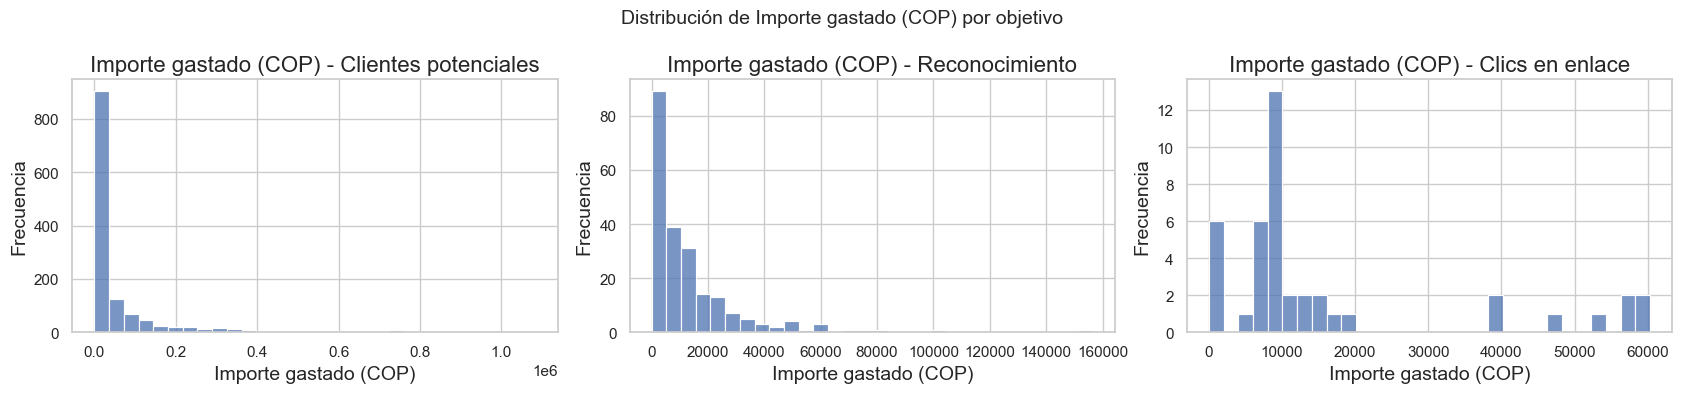

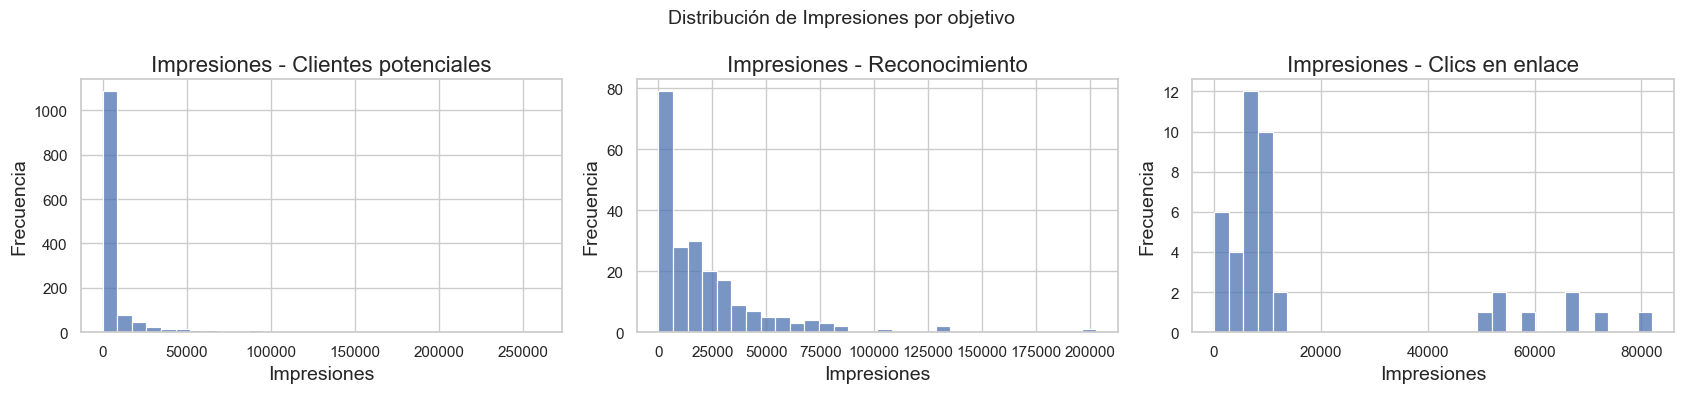

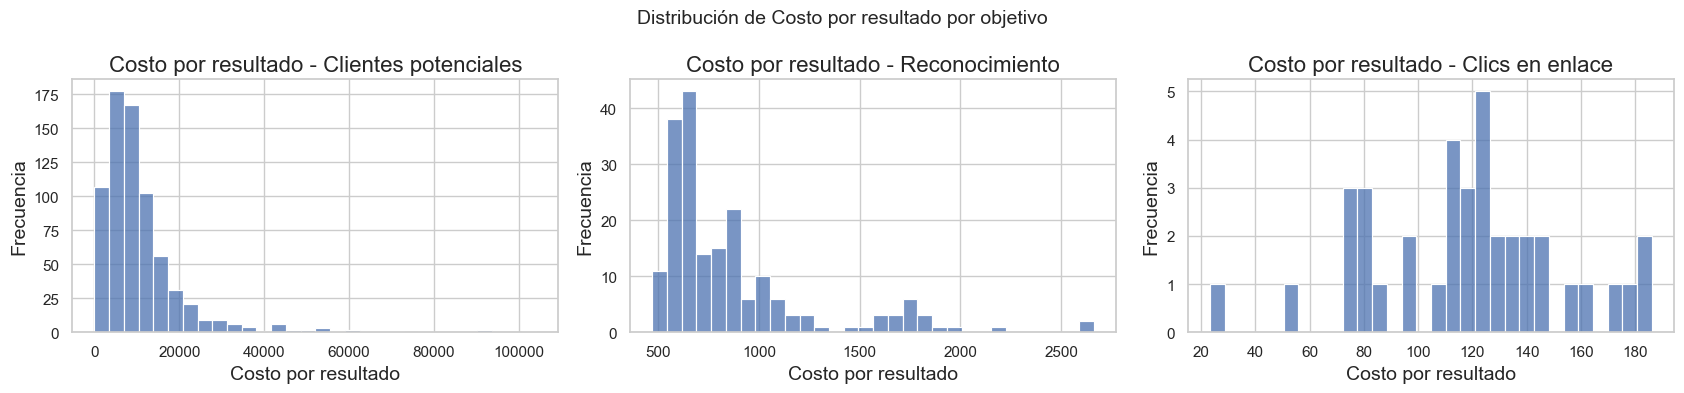

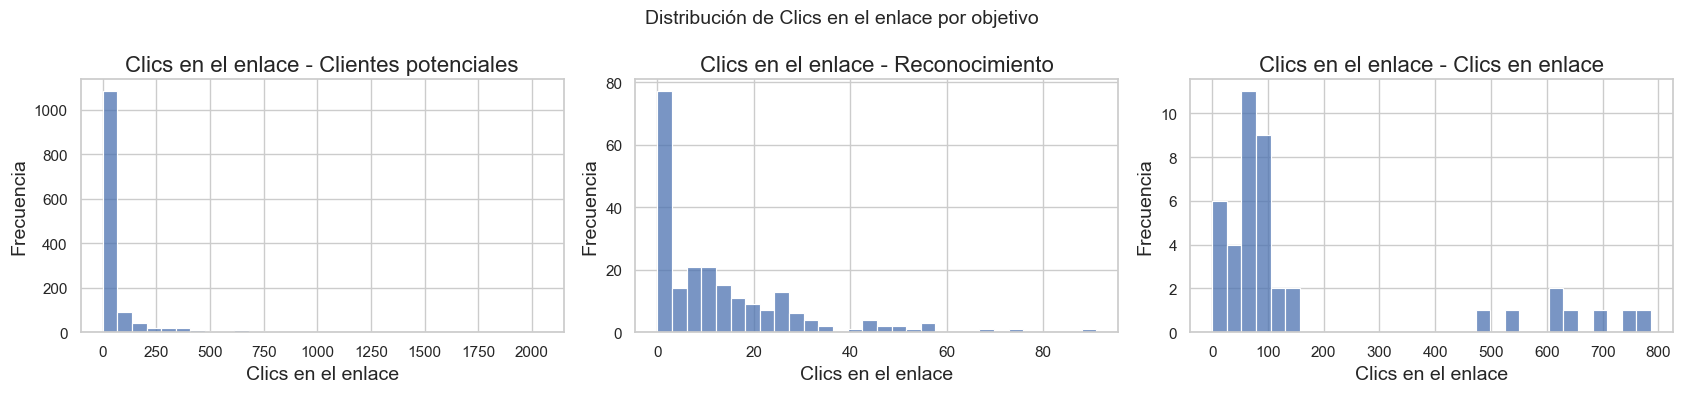

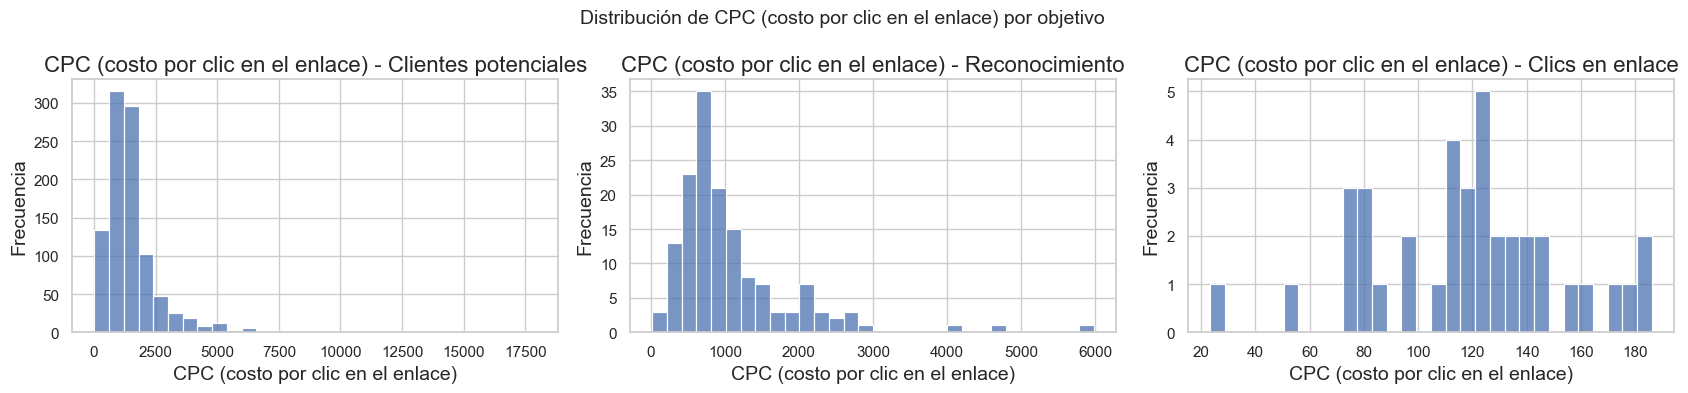

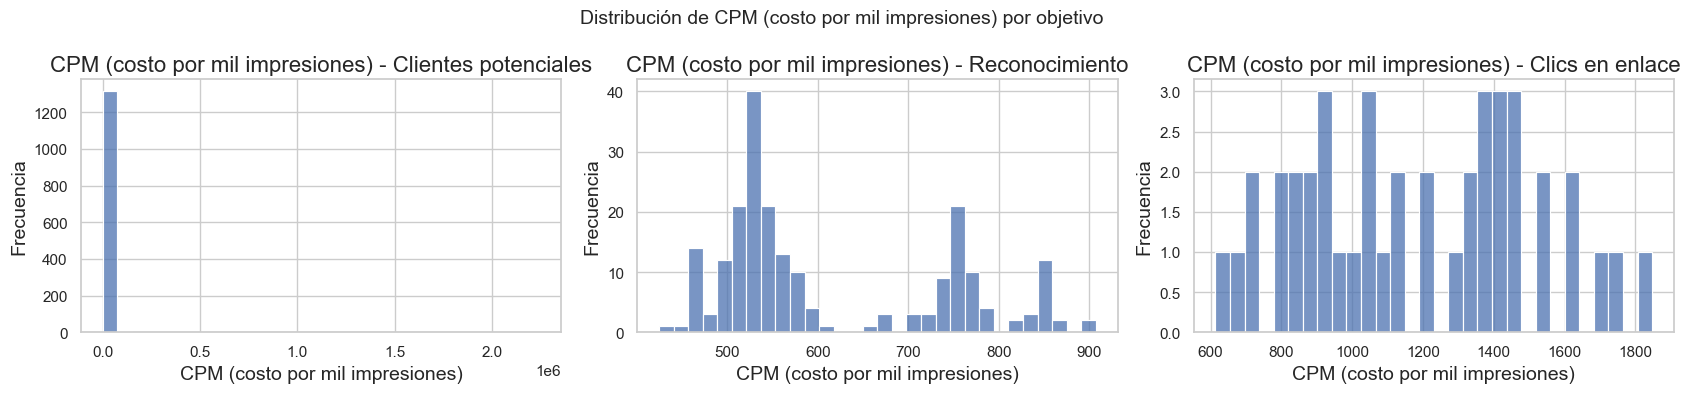

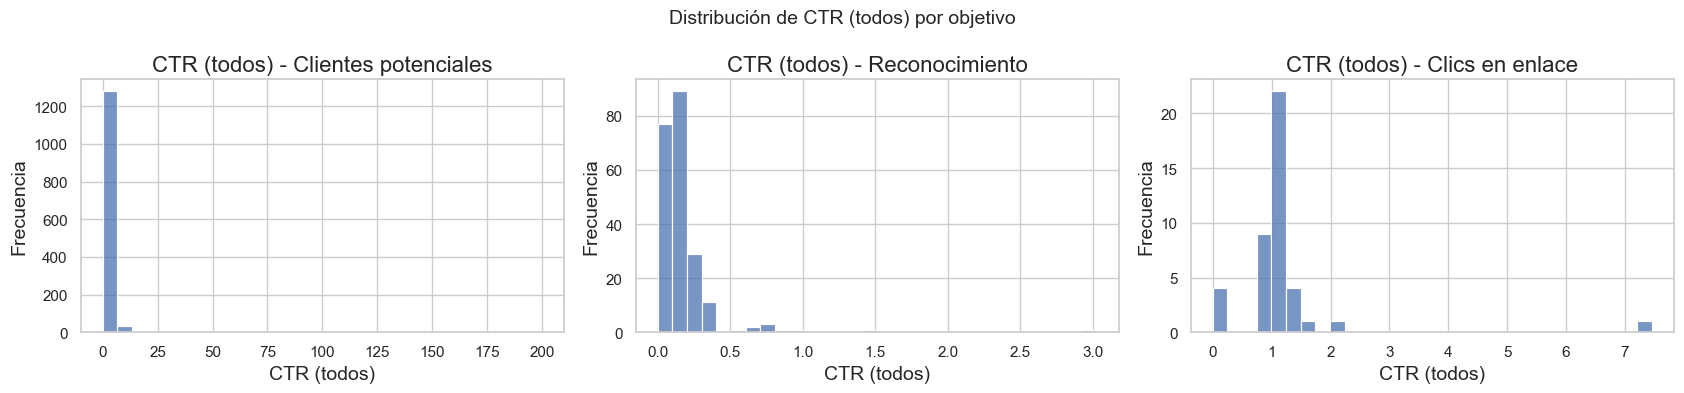

In [118]:
# =========================
# Distribuci√≥n de m√©tricas de desempe√±o y costos
# =========================

vars_numericas = [
    'Importe gastado (COP)',
    'Impresiones',
    'Costo por resultado',
    'Clics en el enlace',
    'CPC (costo por clic en el enlace)',
    'CPM (costo por mil impresiones)',
    'CTR (todos)'
]

# Graficar histograma de cada variable por objetivo de campa√±a
for var in vars_numericas:
    fig, axes = plt.subplots(1, 3, figsize=(17,4))
    for i, (objetivo, df) in enumerate(dfs1.items()):
        sns.histplot(df[var], bins=30, kde=False, ax=axes[i])
        axes[i].set_title(f"{var} - {objetivo}")
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Frecuencia")
    plt.suptitle(f"Distribuci√≥n de {var} por objetivo", fontsize=14)
    plt.tight_layout()
    plt.show()

### Conclusiones sobre m√©tricas de desempe√±o y costos

En el an√°lisis de las m√©tricas de costo (**Costo por resultado, CPC y CPM**) se observa que todas presentan
**distribuciones sesgadas positivamente**, con la mayor√≠a de los anuncios concentrados en valores bajos y
algunos outliers con costos muy elevados.

Al segmentar por objetivo de campa√±a aparecen diferencias claras:

- **Clientes potenciales (Leads):**  
  Los costos son los m√°s altos, ya que captar un lead es mucho m√°s complejo que mostrar un anuncio
  o lograr un clic.  
  En algunos casos el costo por lead supera los **50.000 COP**.

- **Reconocimiento y Clics en enlace:**  
  Presentan costos m√°s bajos. Mostrar un anuncio a una audiencia amplia o lograr un clic es
  considerablemente m√°s barato que obtener leads o ventas.  

## Distribuci√≥n de variables categ√≥ricas por objetivo de campa√±a

En esta secci√≥n analizo c√≥mo se distribuyen las variables categ√≥ricas del dataset (**Objetivo, Edad, Sexo,
Llamada a la acci√≥n, Tipo de resultado y Mes**) segmentadas por cada tipo de campa√±a.

El objetivo es identificar patrones de configuraci√≥n y comportamiento que complementen el an√°lisis de las
variables num√©ricas y permitan entender mejor la l√≥gica detr√°s de la segmentaci√≥n de las campa√±as.

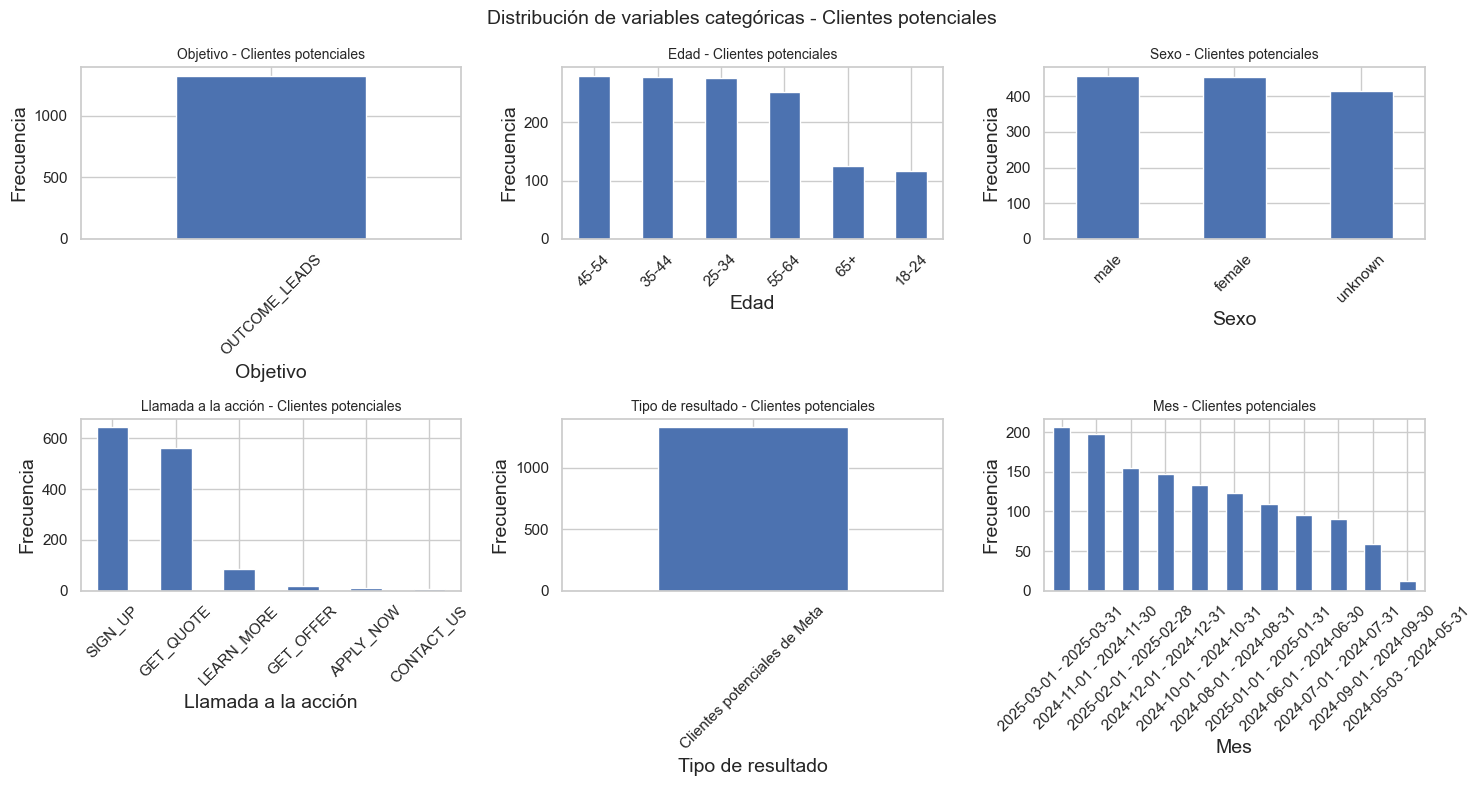

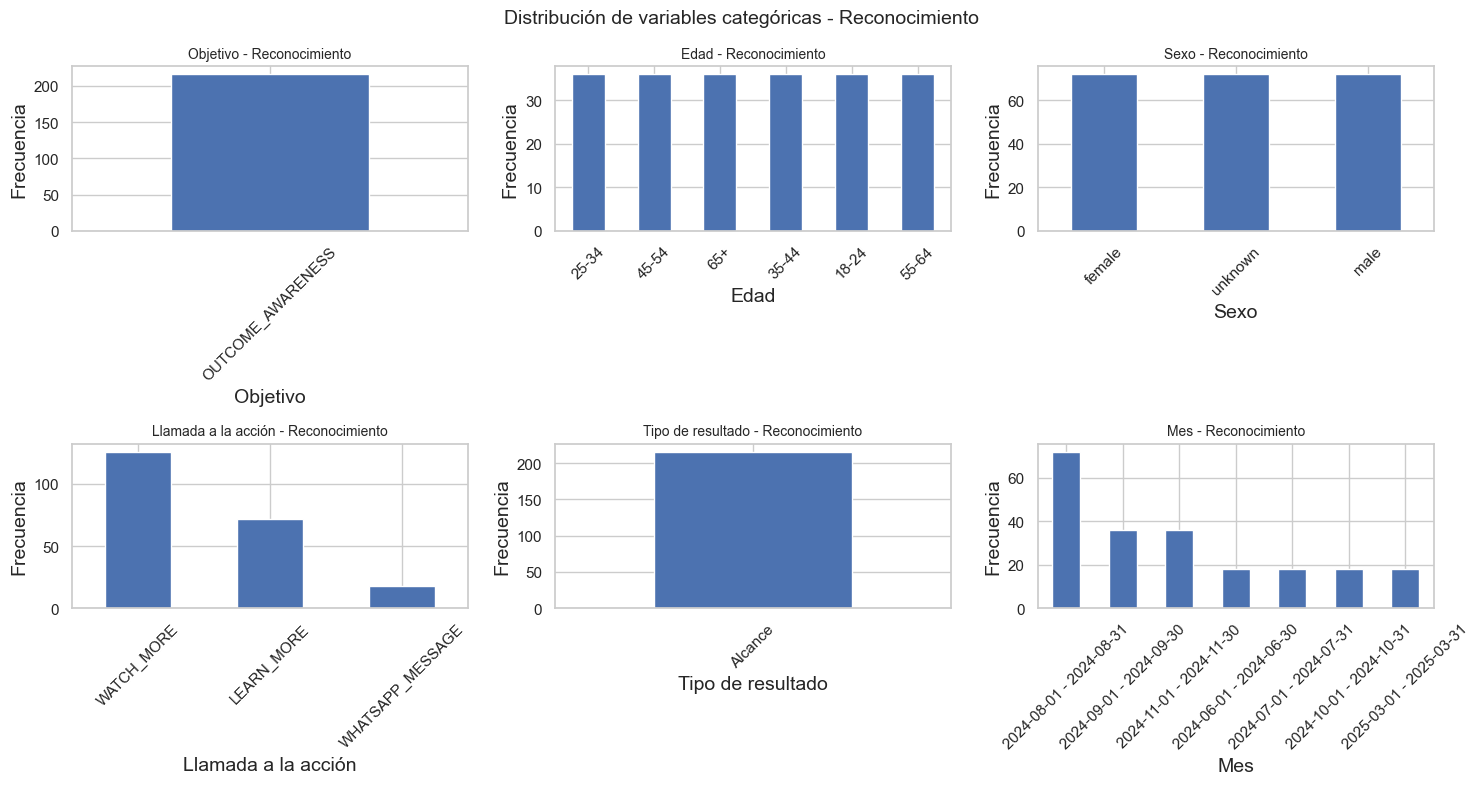

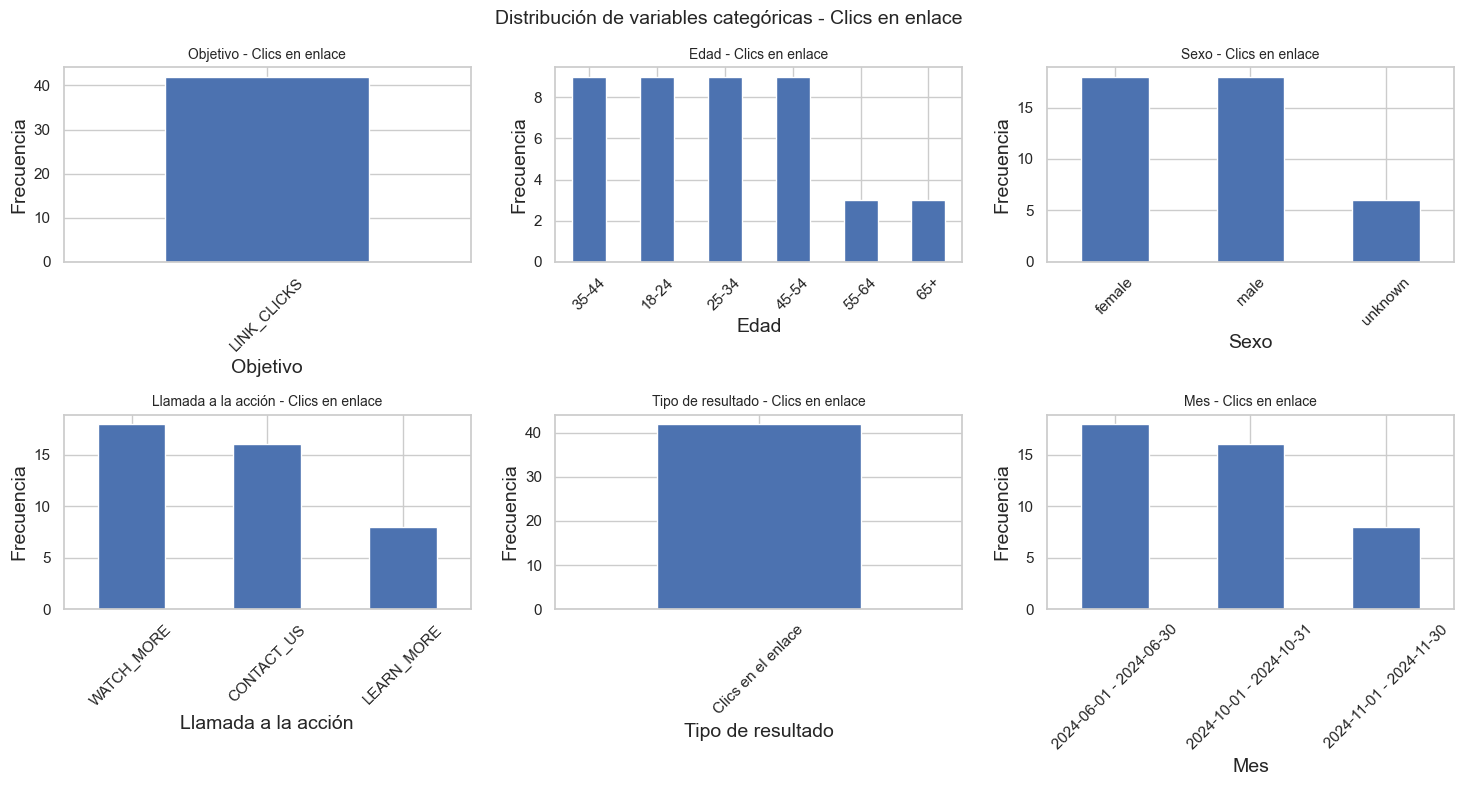

In [139]:
# =========================
# Distribuci√≥n de variables categ√≥ricas
# =========================

cols_cat = ['Objetivo', 'Edad', 'Sexo', 'Llamada a la acci√≥n', 'Tipo de resultado', 'Mes']

for objetivo, df in dfs1.items():
    n_cols = 3
    n_rows = (len(cols_cat) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(cols_cat):
        df[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"{col} - {objetivo}", fontsize=10)
        axes[i].set_ylabel("Frecuencia")
        axes[i].tick_params(axis='x', rotation=45)

    # eliminar ejes vac√≠os en caso de que sobren
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f"Distribuci√≥n de variables categ√≥ricas - {objetivo}", fontsize=14)
    plt.tight_layout()
    plt.show()

### An√°lisis univariado de variables categ√≥ricas

Al analizar las variables categ√≥ricas segmentadas por objetivo de campa√±a, se observan los siguientes hallazgos:

- **Objetivo y Tipo de resultado**  
  - La gran mayor√≠a de anuncios est√° enfocada en **Clientes potenciales (Leads)**, lo cual es coherente con el sector inmobiliario, donde el principal inter√©s es captar registros de usuarios interesados.  
  - Los objetivos de **Reconocimiento** y **Clics en enlace** tienen menor participaci√≥n.  
  - Aunque tambi√©n aparecen anuncios con objetivos de **Ventas** e **Interacci√≥n**, previamente se evidenci√≥ que no generaron resultados, por lo cual su aporte es nulo.  
  - Existe proporcionalidad directa entre el *Objetivo* y el *Tipo de resultado*, ya que ambos reflejan la misma l√≥gica de configuraci√≥n de campa√±as.

- **Edad**  
  - La pauta se concentra mayoritariamente en el rango de **25 a 54 a√±os**, que corresponde al segmento objetivo m√°s com√∫n en la compra de vivienda.  
  - Los extremos (18‚Äì24 y 65+) tienen presencia menor, lo cual refleja que se priorizan segmentos econ√≥micamente m√°s activos.

- **Sexo**  
  - La distribuci√≥n entre **hombres y mujeres** es bastante equilibrada.  
  - Aparece un valor ‚Äú**unknown**‚Äù con una proporci√≥n considerable, lo que indica que Meta Ads no siempre logra asignar el g√©nero de los usuarios alcanzados o que algunas campa√±as se configuraron sin restricci√≥n de sexo. Este hallazgo debe documentarse, ya que puede generar sesgos en futuros modelos.

- **Llamada a la acci√≥n (CTA)**  
  - En campa√±as de **Leads**, predominan las acciones **SIGN_UP**, **GET_QUOTE** y **WHATSAPP_MESSAGE**, todas orientadas a captaci√≥n de clientes.  
  - En **Reconocimiento** y **Clics en enlace**, se destacan CTAs como **WATCH_MORE** y **LEARN_MORE**, m√°s vinculadas al consumo de contenido que a la conversi√≥n.  
  - Este patr√≥n evidencia que el uso de las llamadas a la acci√≥n est√° alineado con el objetivo principal de cada campa√±a.

- **Mes**  
  - Los anuncios se distribuyen en distintos periodos desde 2024 hasta 2025, aunque con cierta irregularidad.  
  - Un hallazgo importante es que, tras filtrar los objetivos de Ventas e Interacci√≥n, la √∫ltima fecha con anuncios activos corresponde a **marzo de 2025**, a pesar de que el archivo fue exportado en agosto de 2025.  
  - Esto genera una inconsistencia, pues en la pr√°ctica s√≠ exist√≠an campa√±as de Leads activas despu√©s de marzo 2025. El comportamiento puede deberse a un error en la exportaci√≥n de Meta Ads o a la forma en que se asignan las fechas a cada anuncio.  

## An√°lisis Bivariado y correlaciones entre variables

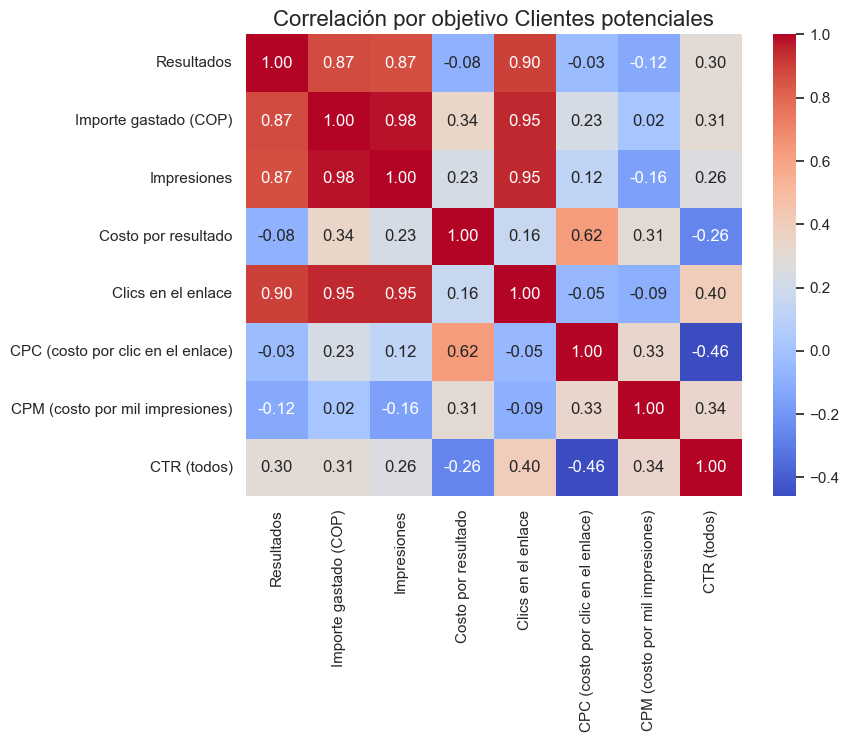

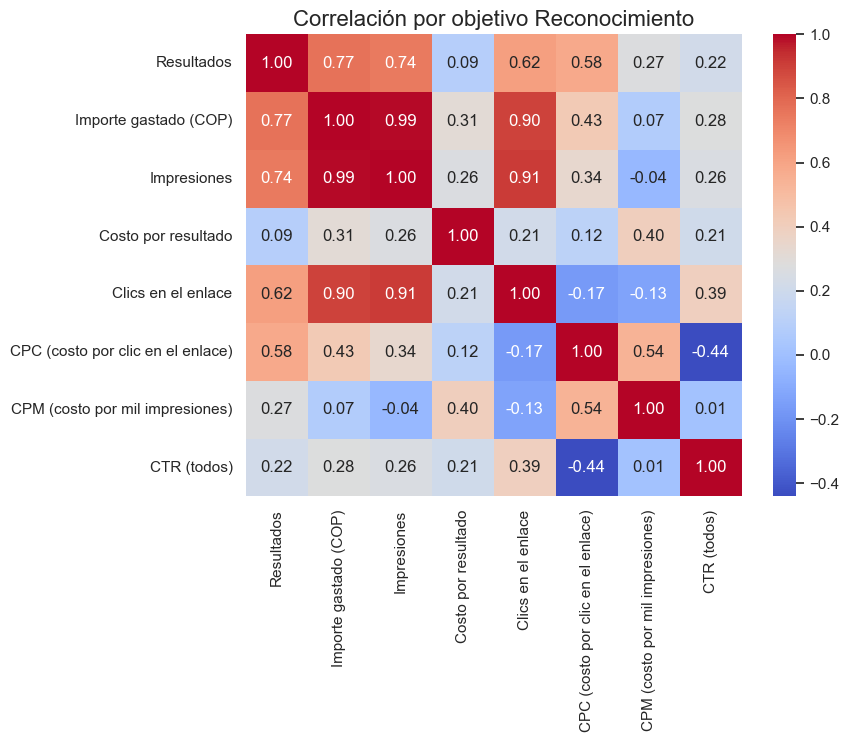

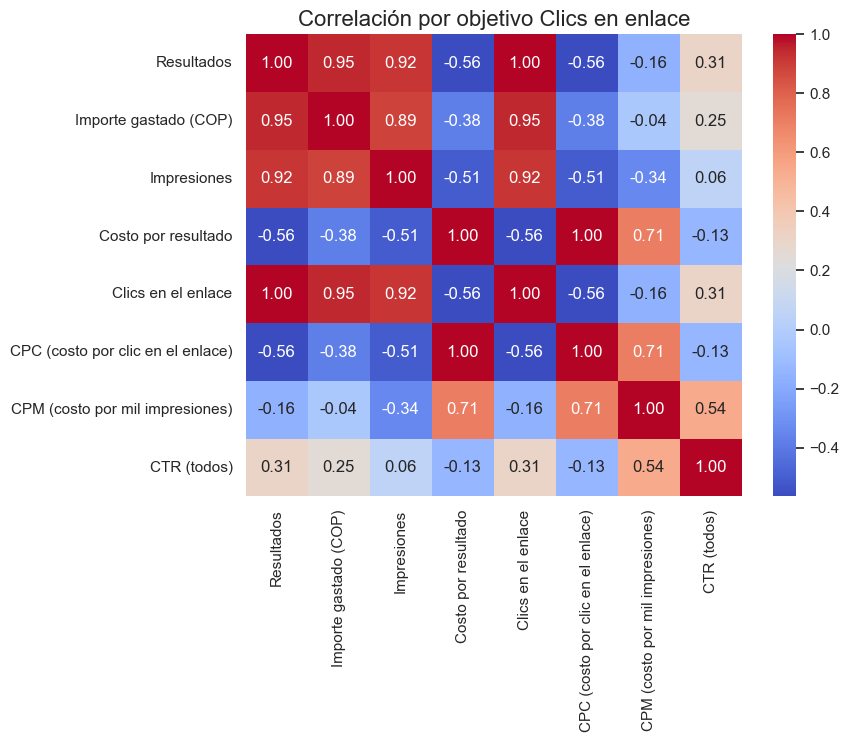

In [138]:
# =========================
# An√°lisis bivariado y correlaciones
# =========================

vars_numericas1 = [
    'Resultados',
    'Importe gastado (COP)',
    'Impresiones',
    'Costo por resultado',
    'Clics en el enlace',
    'CPC (costo por clic en el enlace)',
    'CPM (costo por mil impresiones)',
    'CTR (todos)'
]

# Mapa de calor de correlaciones por objetivo
for objetivo, df in dfs1.items():
    plt.figure(figsize=(8,6))
    sns.heatmap(df[vars_numericas1].corr(method="spearman"), 
                annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlaci√≥n por objetivo {objetivo}")
    plt.show()

## An√°lisis de correlaciones por objetivo
1. Clientes potenciales (Leads)  
- **Variables m√°s relacionadas con Resultados:**
  - Importe gastado (0.87)
  - Impresiones (0.87)
  - Clics en el enlace (0.90)  
- **Variables poco relacionadas:**
  - Costo por resultado (-0.08)  
- **Observaci√≥n clave:**  
  Existe **multicolinealidad muy alta** entre *importe gastado*, *impresiones* y *clics en el enlace* (correlaciones >0.95), por lo que aportan informaci√≥n redundante.

2. Reconocimiento  
- **Variables m√°s relacionadas con Resultados:**
  - Importe gastado (0.77)
  - Impresiones (0.74)
  - Clics en el enlace (0.62)  
- **Variables poco relacionadas:**
  - CTR (0.22)
  - CPM (0.27)  
- **Observaci√≥n clave:**  
  Las correlaciones son m√°s moderadas que en leads. Las m√©tricas de eficiencia (CTR, CPM) no explican directamente los resultados.


3. Clics en el enlace  
- **Variables m√°s relacionadas con Resultados:**
  - Clics en el enlace (1.00)
  - Importe gastado (0.95)
  - Impresiones (0.92)  
- **Variables poco relacionadas:**
  - CPM (-0.16)
  - CTR (0.31)  
- **Observaci√≥n clave:**  
  El **costo por resultado** tiene correlaci√≥n negativa fuerte (-0.56): a m√°s clics, menor costo unitario.  
  El CPM y CPC est√°n positivamente correlacionados entre s√≠ (0.71), reflejando consistencia en costos.

## Relaci√≥n entre variables categ√≥ricas y Resultados (Test de Kruskal-Wallis)

Para evaluar si las variables categ√≥ricas tienen una relaci√≥n estad√≠sticamente significativa con la variable 
**`Resultados`**, apliqu√© la prueba no param√©trica de **Kruskal-Wallis**.  
Este test permite comparar las distribuciones de resultados entre diferentes grupos dentro de cada variable.

In [121]:
# =========================
# Test de Kruskal-Wallis
# =========================
kruskal_results = []

for objetivo, df in dfs1.items():
    for col in cols_cat:
        
        grupos = [df[df[col] == categoria]['Resultados'].dropna() 
                  for categoria in df[col].unique()]

        
        if len([g for g in grupos if len(g) > 0]) > 1:
            stat, p = kruskal(*grupos)
            kruskal_results.append([objetivo, col, stat, p])
        else:
            kruskal_results.append([objetivo, col, None, None])

kruskal_df = pd.DataFrame(kruskal_results, 
                          columns=['Objetivo', 'Variable', 'H', 'p-value'])

kruskal_df = kruskal_df.sort_values(by=['Objetivo', 'p-value'])
kruskal_df

Objetivo             Variable           H       p-value
17       Clics en enlace                  Mes   19.007773  7.456148e-05
14       Clics en enlace                 Sexo   15.419088  4.485260e-04
15       Clics en enlace  Llamada a la acci√≥n    4.473457  1.068074e-01
13       Clics en enlace                 Edad    0.825191  9.753989e-01
12       Clics en enlace             Objetivo         NaN           NaN
16       Clics en enlace    Tipo de resultado         NaN           NaN
2   Clientes potenciales                 Sexo  355.806496  5.465139e-78
1   Clientes potenciales                 Edad   83.068009  1.912356e-16
5   Clientes potenciales                  Mes   53.055322  7.271875e-08
3   Clientes potenciales  Llamada a la acci√≥n   39.993982  1.497547e-07
0   Clientes potenciales             Objetivo         NaN           NaN
4   Clientes potenciales    Tipo de resultado         NaN           NaN
8         Reconocimiento                 Sexo  108.710131  2.476823e-24
9         Reconocimiento  Llamada a la acci√≥n   47.545046  4.739412e-11
11        Reconocimiento                  Mes   56.832724  1.975060e-10
7         Reconocimiento                 Edad   26.243648  8.003186e-05
6         Reconocimiento             Objetivo         NaN           NaN
10        Reconocimiento    Tipo de resultado         NaN           NaN


### Principales hallazgos

- **Clientes potenciales (Leads):**
  - La variable **Sexo** muestra una relaci√≥n significativa (p < 0.001). Esto indica que los resultados var√≠an
    seg√∫n el g√©nero al que se dirigen los anuncios.  
  - **Edad** y **Llamada a la acci√≥n (CTA)** tambi√©n tienen asociaci√≥n significativa, lo cual refleja que
    ciertos rangos de edad y ciertos CTA generan m√°s leads que otros.  
  - La variable **Mes** tambi√©n resulta significativa, mostrando variaciones temporales en el rendimiento de las campa√±as.

- **Reconocimiento:**
  - **Sexo** y **Llamada a la acci√≥n** aparecen como variables significativas (p < 0.001), lo que confirma
    que estas categor√≠as influyen en el alcance obtenido.  
  - El **Mes** tambi√©n tiene relaci√≥n con los resultados, lo que evidencia un comportamiento temporal.

- **Clics en enlace:**
  - **Sexo** y **Mes** son las variables con mayor nivel de significancia, lo que indica que tanto el g√©nero
    del p√∫blico como la temporalidad afectan el n√∫mero de clics conseguidos.  
  - **Llamada a la acci√≥n (CTA)** tambi√©n tiene relaci√≥n, aunque en menor medida.  


## Selecci√≥n de variables por objetivo

En esta etapa seleccion√© manualmente las variables que considero relevantes para cada tipo de objetivo
(**Leads, Reconocimiento y Clics en enlace**).  

La selecci√≥n incluye tanto variables num√©ricas (como inversi√≥n, impresiones, clics) como categ√≥ricas 
(edad, sexo, mes, llamada a la acci√≥n).  

Un punto importante es que, aunque se identific√≥ **multicolinealidad alta** entre algunas de las variables 
(num√©ricas como *importe gastado, impresiones y clics en el enlace*), decid√≠ mantenerlas en el an√°lisis.  

### ¬øPor qu√© mantener variables con multicolinealidad?
- Estas variables, aunque correlacionadas, representan **dimensiones clave del desempe√±o de campa√±as** 
  que no deben descartarse sin m√°s, ya que cada una aporta un √°ngulo distinto:  
  - *Importe gastado* refleja la inversi√≥n directa.  
  - *Impresiones* capturan el alcance.  
  - *Clics en el enlace* muestran la interacci√≥n real de los usuarios.  
- El hecho de que est√©n fuertemente relacionadas no significa que sean irrelevantes; 
  simplemente aportan informaci√≥n redundante que puede afectar modelos lineales sin regularizaci√≥n.  

### Tratamiento de la multicolinealidad
En lugar de eliminarlas, se les dar√° un tratamiento mediante **t√©cnicas de regularizaci√≥n** 
(como Ridge, Lasso o Elastic Net).  
Estas t√©cnicas penalizan los coeficientes de las variables altamente correlacionadas, 
permitiendo que el modelo mantenga todas las variables pero reduciendo el peso de las redundantes.  

De esta manera, se asegura que:
1. **Ninguna variable clave se pierde** en el an√°lisis.  
2. Se controla el efecto de la multicolinealidad para evitar problemas de sobreajuste.  
3. El modelo final puede ser m√°s interpretable y robusto.  

In [140]:
# =========================
# Selecci√≥n de variables por objetivo de campa√±a
# =========================
vars_por_objetivo = {
    "Clientes potenciales": {
        "numericas": [
            "Importe gastado (COP)", 
            "Impresiones", 
            "Clics en el enlace"
        ],
        "categoricas": [
            "Sexo",     
            "Edad",     
            "Mes",      
            "Llamada a la acci√≥n"  
        ]
    },

    "Reconocimiento": {
        "numericas": [
            "Importe gastado (COP)", 
            "Impresiones", 
            "Clics en el enlace"
        ],
        "categoricas": [
            "Sexo",     
            "Llamada a la acci√≥n", 
            "Mes",      
            "Edad"      
        ]
    },

    "Clics en enlace": {
        "numericas": [
            "Importe gastado (COP)", 
            "Impresiones", 
            "Clics en el enlace", 
        ],
        "categoricas": [
            "Mes",     
            "Sexo",     
        ]
    }
}

## Relaci√≥n entre variables num√©ricas y Resultados

En esta secci√≥n analizo la relaci√≥n entre las variables num√©ricas seleccionadas y la variable 
**Resultados**, utilizando diagramas de dispersi√≥n.  
El objetivo es observar patrones de dependencia y validar si estas m√©tricas explican el desempe√±o 
de las campa√±as publicitarias.

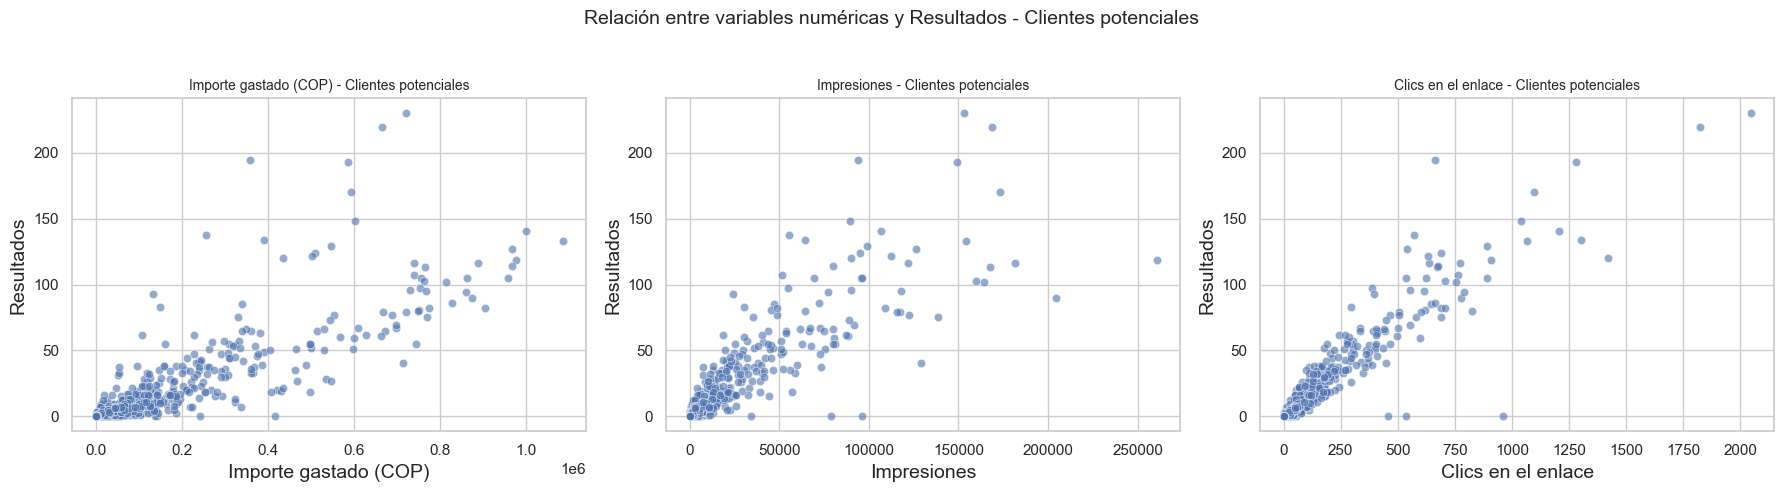

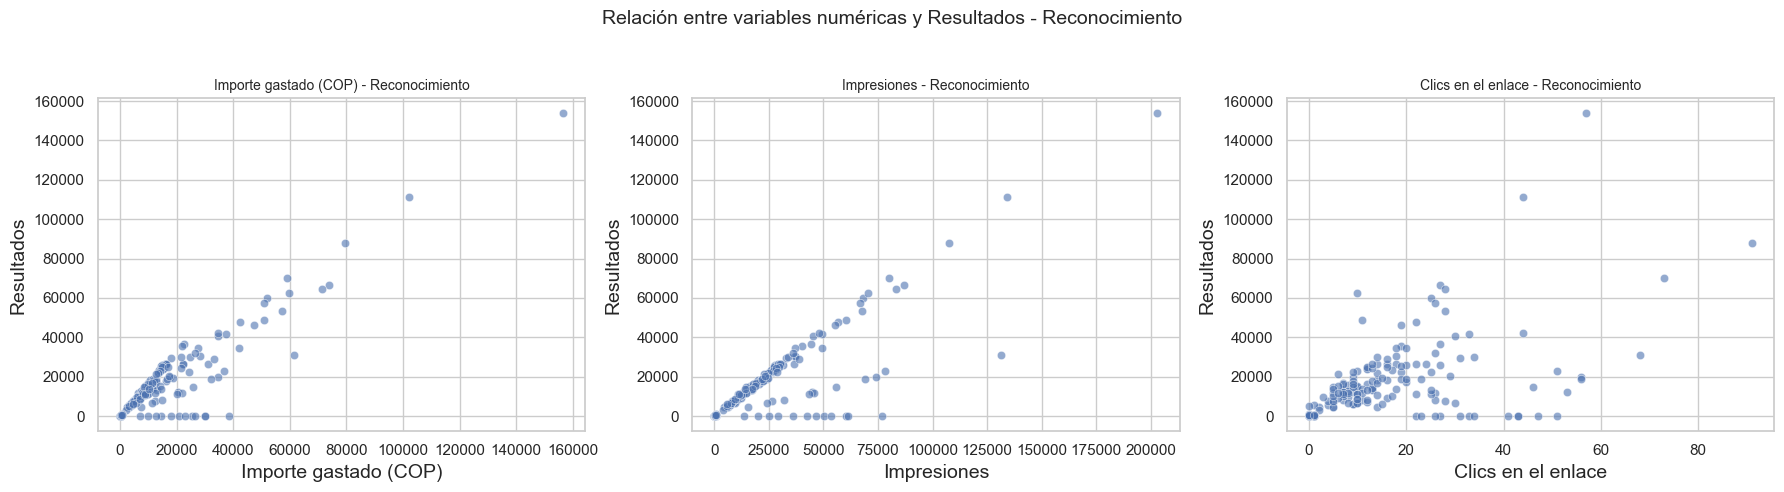

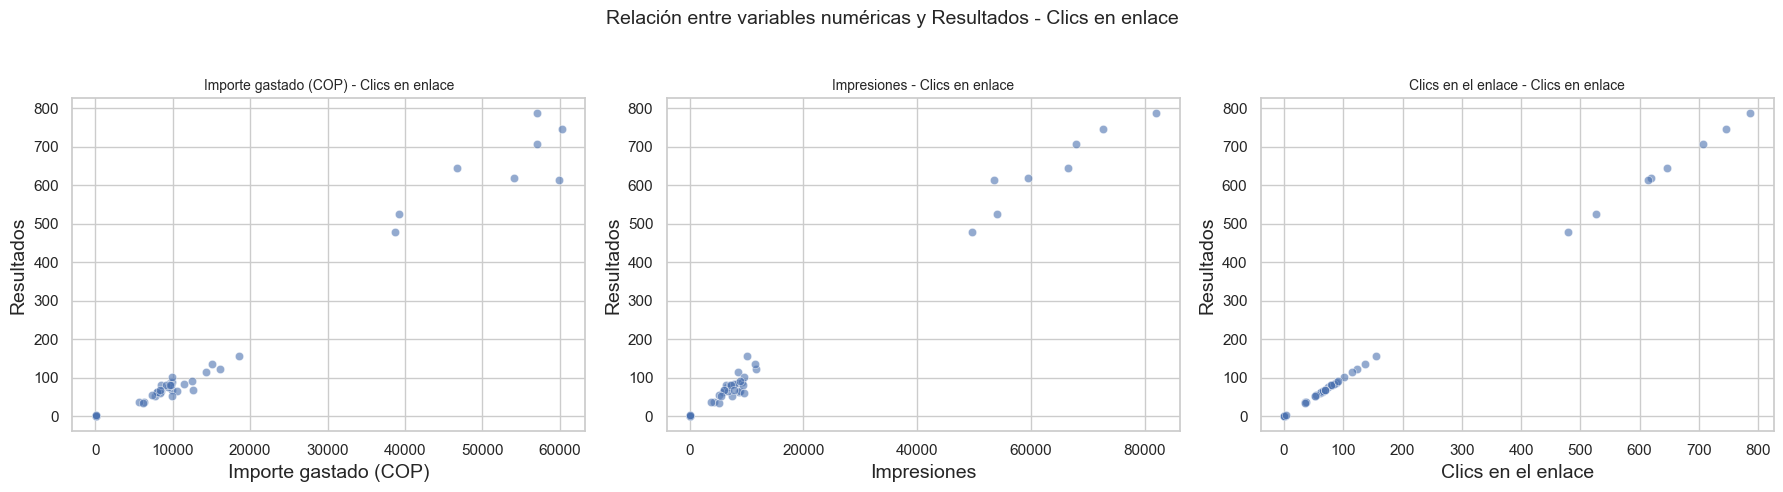

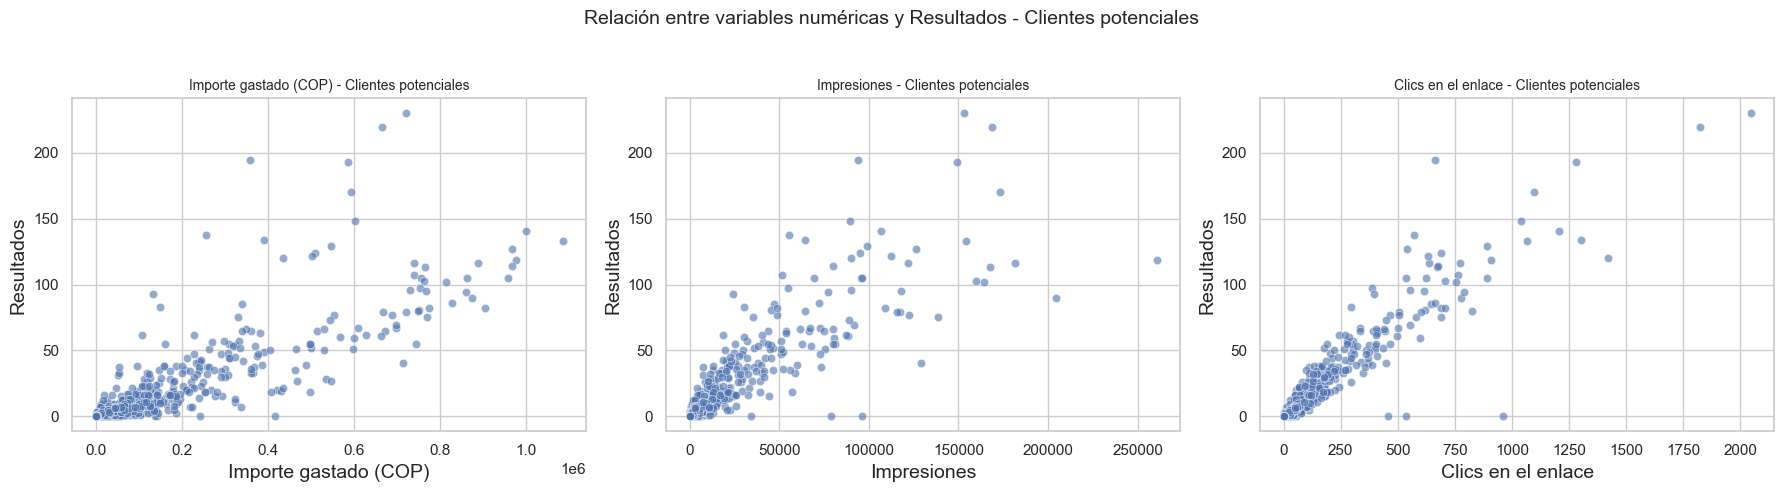

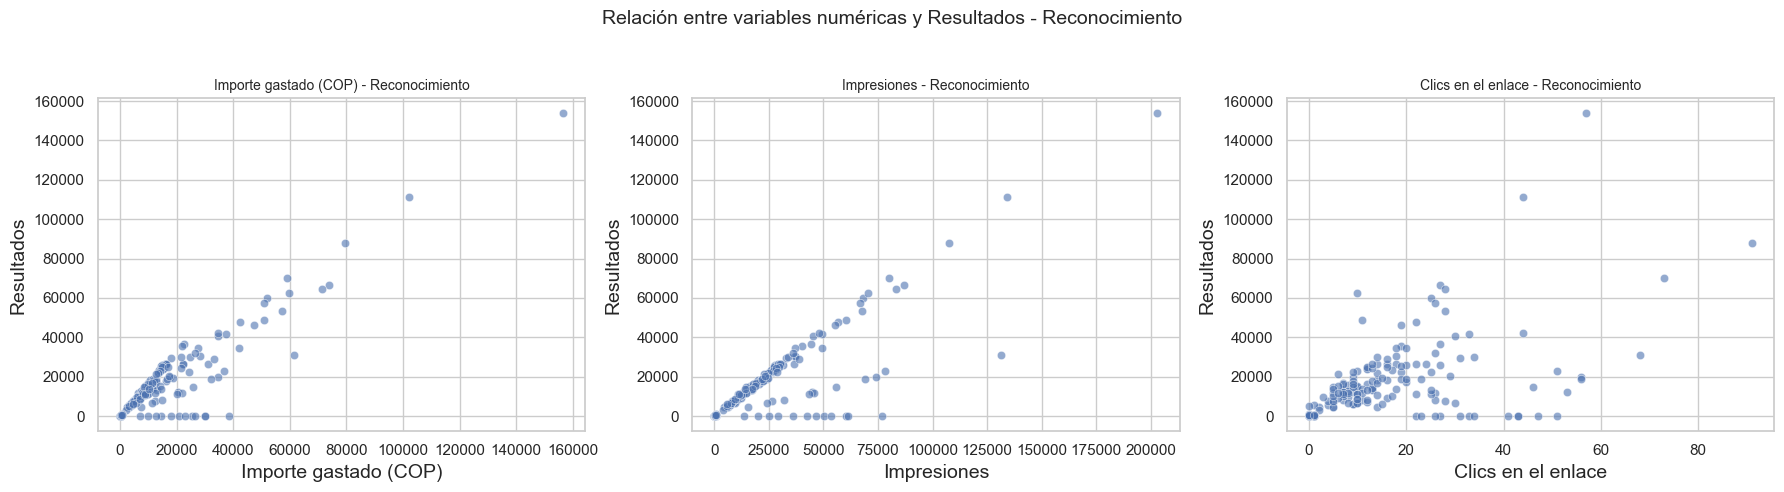

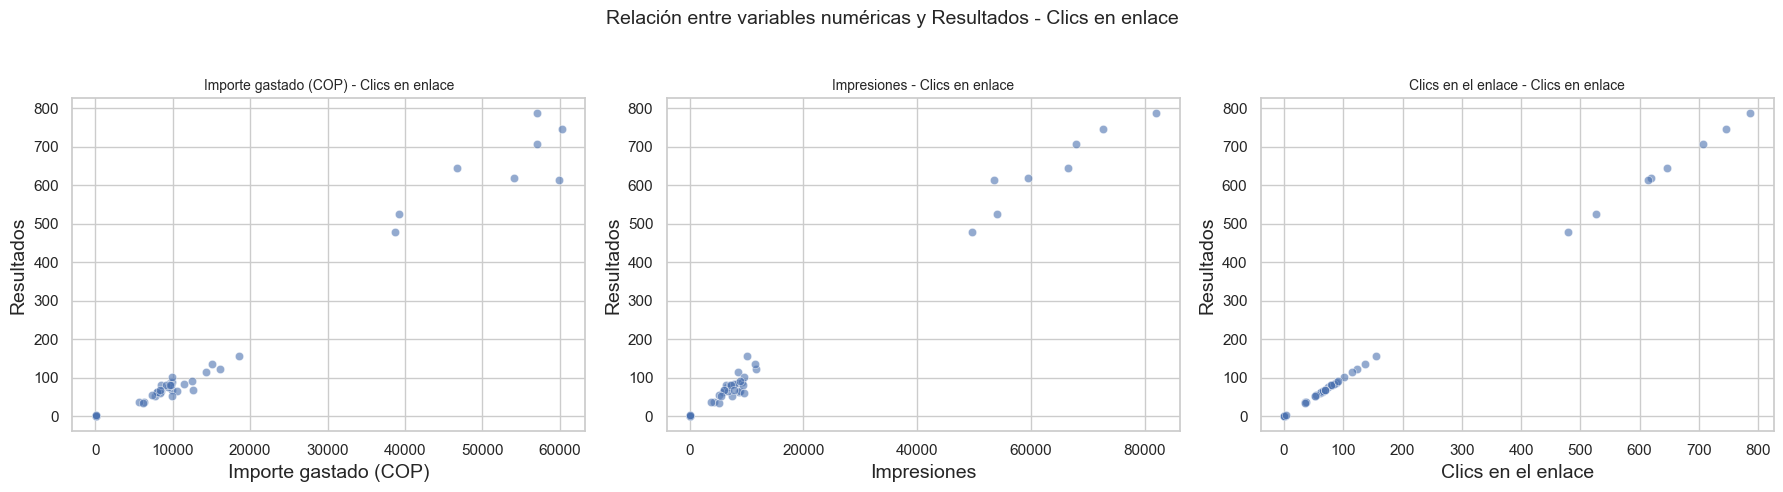

In [141]:
# ================================
# Relaci√≥n entre variables num√©ricas y Resultados
# ================================

for objetivo, vars_dict in vars_por_objetivo.items():
    df = dfs1[objetivo]

    # Definir n√∫mero de variables num√©ricas
    num_vars = vars_dict["numericas"]
    n = len(num_vars)

    # Crear subplots din√°micos
    fig, axes = plt.subplots(1, n, figsize=(6*n, 5))

    for i, var in enumerate(num_vars):
        sns.scatterplot(x=df[var], y=df["Resultados"], alpha=0.6, ax=axes[i])
        axes[i].set_title(f"{var} - {objetivo}", fontsize=10)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Resultados")

    fig.suptitle(f"Relaci√≥n entre variables num√©ricas y Resultados - {objetivo}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
for objetivo, vars_dict in vars_por_objetivo.items():
    df = dfs1[objetivo]
    
    # Definir n√∫mero de variables num√©ricas
    num_vars = vars_dict["numericas"]
    n = len(num_vars)
    
    # Crear subplots (1 fila, n columnas)
    fig, axes = plt.subplots(1, n, figsize=(6*n, 5))
    
    for i, var in enumerate(num_vars):
        sns.scatterplot(x=df[var], y=df["Resultados"], alpha=0.6, ax=axes[i])
        axes[i].set_title(f"{var} - {objetivo}", fontsize=10)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Resultados")
    
    fig.suptitle(f"Relaci√≥n entre variables num√©ricas y Resultados - {objetivo}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

### Conclusiones del an√°lisis bivariado de variables num√©ricas y Resultados

Al evaluar la relaci√≥n entre las variables num√©ricas y la variable **Resultados** mediante 
diagramas de dispersi√≥n, se confirman varios hallazgos importantes:

- En los tres objetivos principales (**Clientes potenciales, Reconocimiento y Clics en enlace**) 
  se observa una **relaci√≥n positiva fuerte** entre la inversi√≥n (*Importe gastado*), 
  el alcance (*Impresiones*), la interacci√≥n (*Clics en el enlace*) y los resultados obtenidos.  
  Esto significa que, a mayor inversi√≥n y exposici√≥n, mayor es la probabilidad de generar resultados.

- Los gr√°ficos muestran una **tendencia casi lineal**, lo que valida que estas variables 
  son los principales impulsores del rendimiento en campa√±as digitales.  
  Sin embargo, tambi√©n aparecen **outliers**: anuncios que, con niveles similares de inversi√≥n 
  o impresiones, obtienen resultados muy por encima o por debajo de lo esperado.  
  Estos casos son clave para identificar campa√±as altamente efectivas o ineficientes.

- El patr√≥n es **consistente en todos los objetivos**, aunque la magnitud var√≠a:
  - En *Clientes potenciales*, los resultados suelen ser bajos en volumen, pero el costo por cada lead es alto.  
  - En *Reconocimiento*, la escala es mucho mayor, con decenas de miles de impresiones y un rendimiento m√°s estable.  
  - En *Clics en enlace*, se aprecia una correlaci√≥n casi perfecta entre clics y resultados, lo cual tiene sentido dado que el resultado est√° directamente definido por esa m√©trica.

## An√°lisis bivariado de variables categ√≥ricas y Resultados

===== Clientes potenciales =====


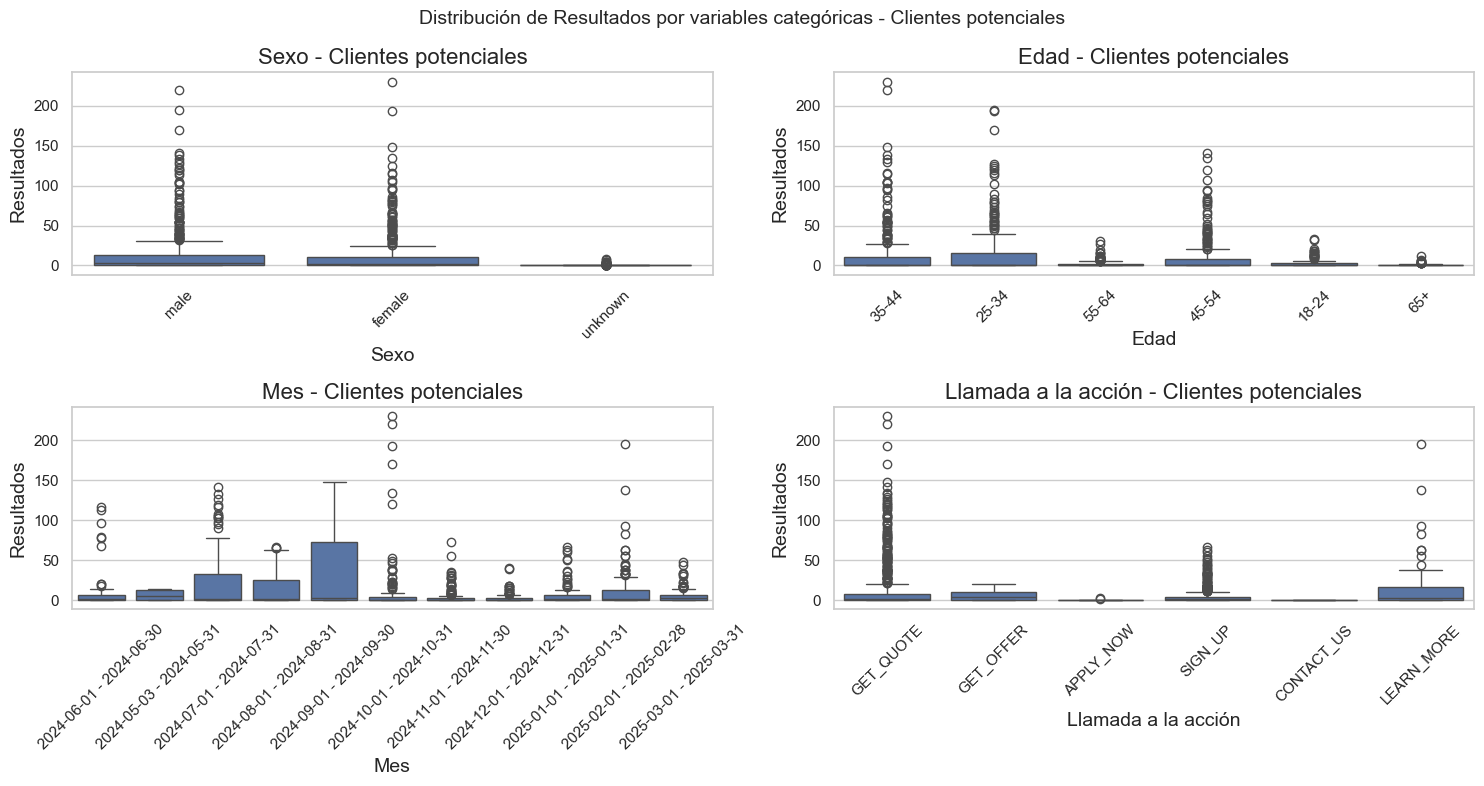

===== Reconocimiento =====


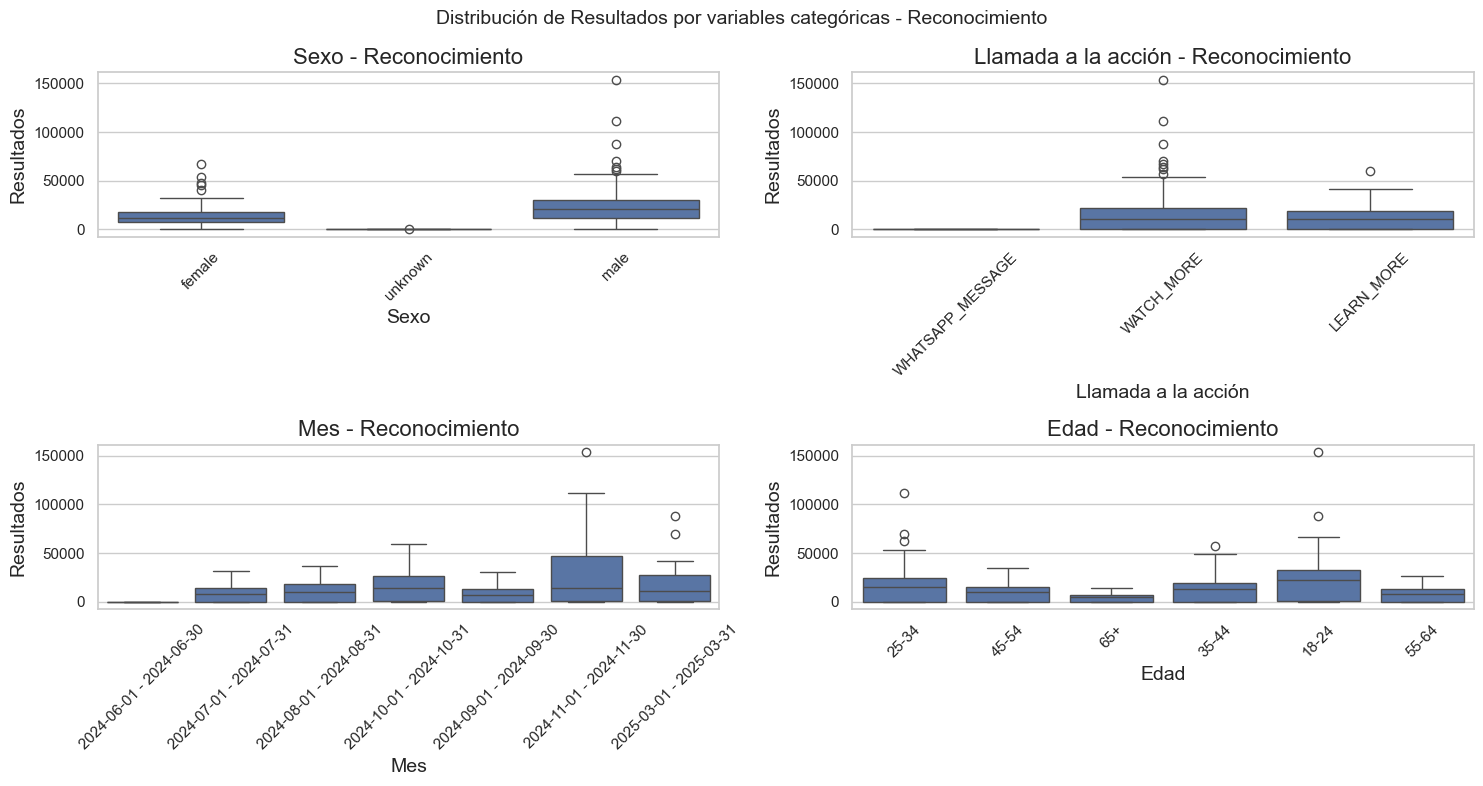

===== Clics en enlace =====


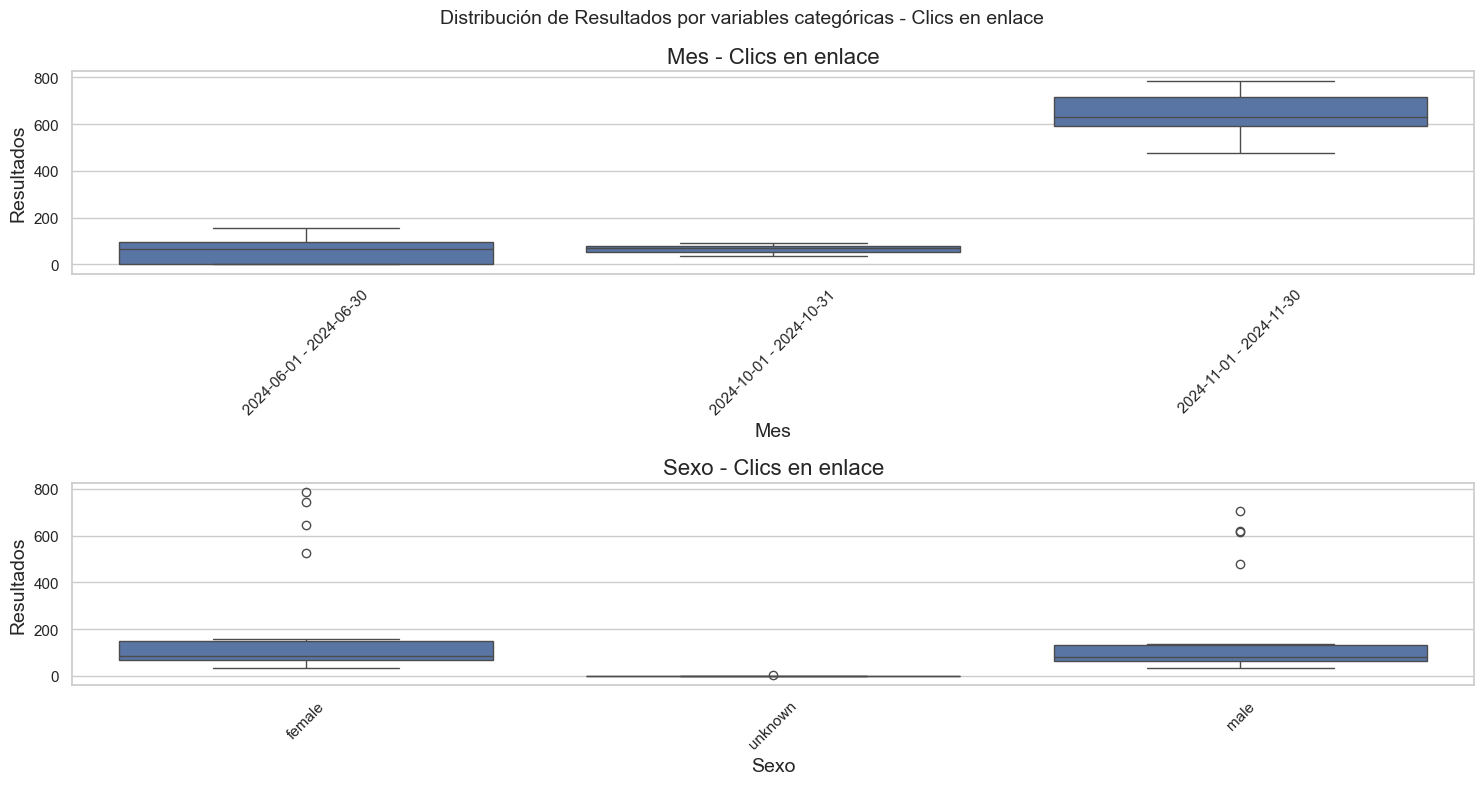

In [124]:
# ================================
# Relaci√≥n entre variables categ√≥ricas y Resultados
# ================================
for objetivo, vars_dict in vars_por_objetivo.items():
    df = dfs1[objetivo]

    print(f"===== {objetivo} =====")
    cat_vars = vars_dict["categoricas"]

    # Crear figura de boxplots
    fig, axes = plt.subplots(2, (len(cat_vars) + 1) // 2, figsize=(15, 8))
    axes = axes.flatten()

    for i, col in enumerate(cat_vars):
        sns.boxplot(x=col, y="Resultados", data=df, ax=axes[i])
        axes[i].set_title(f"{col} - {objetivo}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Resultados")
        axes[i].tick_params(axis="x", rotation=45)

    plt.suptitle(f"Distribuci√≥n de Resultados por variables categ√≥ricas - {objetivo}", fontsize=14)
    plt.tight_layout()
    plt.show()

### An√°lisis bivariado de variables categ√≥ricas y *Resultados*

Al relacionar las variables categ√≥ricas con los *Resultados*, se identifican patrones diferenciales seg√∫n cada objetivo:

- **Clientes potenciales**:  
  - **Sexo**: hombres y mujeres presentan comportamientos similares, mientras que *unknown* tiene un aporte pr√°cticamente nulo.  
  - **Edad**: los grupos de **25‚Äì44 a√±os** concentran la mayor√≠a de los resultados, mientras que los extremos (18‚Äì24 y 65+) muestran un bajo rendimiento.  
  - **Mes**: se observan variaciones estacionales con picos destacados en ciertos meses (ej. agosto 2024).  
  - **Llamada a la acci√≥n**: *GET_QUOTE* y *LEARN_MORE* destacan como los m√°s efectivos frente a otros botones.  

- **Reconocimiento**:  
  - **Sexo**: resultados relativamente equilibrados, con ligera ventaja en hombres.  
  - **Edad**: los mejores desempe√±os provienen de p√∫blicos j√≥venes (**18‚Äì34 a√±os**).  
  - **Llamada a la acci√≥n**: destacan *WATCH_MORE* y *LEARN_MORE* sobre *WHATSAPP_MESSAGE*.  
  - **Mes**: se identifican meses con mayor concentraci√≥n de resultados, lo que sugiere efectos estacionales.  

- **Clics en enlace**:  
  - **Edad y sexo**: sin diferencias marcadas, aunque con ligeras ventajas en p√∫blicos j√≥venes y en mujeres.  
  - **Mes**: algunos periodos espec√≠ficos concentran gran parte de los clics, se√±alando momentos m√°s efectivos para pautar.  

En conclusi√≥n, las variables categ√≥ricas aportan informaci√≥n clave para la **segmentaci√≥n estrat√©gica**, permitiendo identificar los grupos de edad, sexos, meses y llamadas a la acci√≥n m√°s efectivos para maximizar los resultados.

# Limpieza de datos

## Manejo de valores nulos restantes

In [125]:
# ============================
# Manejo de valores nulos
# ============================

# Crear indicadores binarios para marcar valores ausentes en costo por resultado y CPC
df_meta['sin_resultado'] = df_meta['Costo por resultado'].isna().astype(int)
df_meta['sin_clics'] = df_meta['CPC (costo por clic en el enlace)'].isna().astype(int)

# Reemplazar nulos en CPM y CTR con la mediana (m√°s robusta a distribuciones sesgadas)
df_meta['CPM (costo por mil impresiones)'] = df_meta['CPM (costo por mil impresiones)'].fillna(
    df_meta['CPM (costo por mil impresiones)'].median()
)
df_meta['CTR (todos)'] = df_meta['CTR (todos)'].fillna(
    df_meta['CTR (todos)'].median()
)

En esta celda se manejaron los valores faltantes de las variables num√©ricas:

- Se crearon las columnas `sin_resultado` y `sin_clics` como **indicadores binarios** para se√±alar si el dato original estaba ausente (1) o no (0).  
- En las columnas con pocos valores nulos (`CPM` y `CTR`), los faltantes se reemplazaron por la **mediana**, ya que es m√°s robusta frente a distribuciones sesgadas.  

Esto permite conservar todos los registros y, al mismo tiempo, informar al modelo de qu√© valores estaban originalmente ausentes.

## Transformaci√≥n de la columna Mes

In [126]:
# ============================
# Transformaci√≥n de columna Mes
# ============================

# Separar la columna de rangos en fecha inicial y convertirla a datetime
df_meta['Mes_inicio'] = df_meta['Mes'].str.split(' - ').str[0]
df_meta['Mes_inicio'] = pd.to_datetime(df_meta['Mes_inicio'], errors='coerce')

# Crear nuevas variables a partir de la fecha
df_meta['Mes1'] = df_meta['Mes_inicio'].dt.month
df_meta['A√±o'] = df_meta['Mes_inicio'].dt.year

En esta celda se transform√≥ la columna `Mes`, que originalmente estaba en formato de rango de fechas, en nuevas variables m√°s √∫tiles:

- `Mes1`: n√∫mero del mes (1‚Äì12).  
- `A√±o`: a√±o correspondiente.  

De esta forma, se facilita el an√°lisis temporal y se ofrece al modelo informaci√≥n m√°s clara sobre la estacionalidad de las campa√±as.

In [127]:
#Verificaci√≥n del dataset
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Nombre de la campa√±a                    2220 non-null   object        
 1   Identificador de la campa√±a             2220 non-null   int64         
 2   Nombre del conjunto de anuncios         2220 non-null   object        
 3   Identificador del conjunto de anuncios  2220 non-null   int64         
 4   Nombre del anuncio                      2220 non-null   object        
 5   Identificador del anuncio               2220 non-null   int64         
 6   Mes                                     2220 non-null   object        
 7   Objetivo                                2220 non-null   object        
 8   Edad                                    2220 non-null   object        
 9   Sexo                                    2220 non-n

# Modelado Predictivo y Comparaci√≥n de Algoritmos por Objetivo de Campa√±a

In [128]:
# ================================
# Definici√≥n de variables por objetivo
# ================================
vars_por_objetivo1 = {
    "Clientes potenciales": {
        "numericas": ["Importe gastado (COP)", "Impresiones", "Clics en el enlace"],
        "categoricas": ["Sexo", "Edad", "Mes1", "A√±o", "Llamada a la acci√≥n"]
    },
    "Reconocimiento": {
        "numericas": ["Importe gastado (COP)", "Impresiones", "Clics en el enlace"],
        "categoricas": ["Sexo", "Edad", "Mes1", "A√±o", "Llamada a la acci√≥n"]
    },
    "Clics en enlace": {
        "numericas": ["Importe gastado (COP)", "Impresiones", "Clics en el enlace"],
        "categoricas": ["Sexo", "Mes1", "A√±o"]
    }
}

In [129]:
# ================================
# Preprocesador por objetivo
# ================================
def crear_preprocesador(objetivo):
    return ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), vars_por_objetivo1[objetivo]["numericas"]),
            ("cat", OneHotEncoder(handle_unknown="ignore"), vars_por_objetivo1[objetivo]["categoricas"])
        ]
    )

In [130]:
# ================================
# Modelos lineales: Ridge, Lasso y Regresi√≥n Lineal
# ================================
def evaluar_objetivo(objetivo, df):
    X = df[vars_por_objetivo1[objetivo]["numericas"] + vars_por_objetivo1[objetivo]["categoricas"]]
    y = df["Resultados"]

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocesador
    preprocessor = crear_preprocesador(objetivo)

    # Modelos
    modelos = {
        "Ridge": Ridge(),
        "Lasso": Lasso(max_iter=5000),
        "Lineal": LinearRegression()
    }

    # Hiperpar√°metros
    param_grid = {
        "Ridge": {"model__alpha": [0.01, 0.1, 1, 10, 100]},
        "Lasso": {"model__alpha": [0.01, 0.1, 1, 10, 100]}
    }

    resultados = {}

    for nombre, modelo in modelos.items():
        pipe = Pipeline([
            ("preprocess", preprocessor),
            ("model", modelo)
        ])

        if nombre in ["Ridge", "Lasso"]:
            grid = GridSearchCV(pipe, param_grid[nombre], cv=5, scoring="r2", n_jobs=-1)
            grid.fit(X_train, y_train)
            mejor_modelo = grid.best_estimator_
            mejor_alpha = grid.best_params_["model__alpha"]
        else:
            mejor_modelo = pipe.fit(X_train, y_train)
            mejor_alpha = None

        # Evaluaci√≥n en test
        y_pred = mejor_modelo.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred) ** 0.5
        mae = mean_absolute_error(y_test, y_pred)

        resultados[nombre] = {
            "R2": r2,
            "RMSE": rmse,
            "MAE": mae,
            "Alpha": mejor_alpha
        }

    return resultados

In [131]:
for obj in vars_por_objetivo1.keys():
    print(f"\n===== {obj} =====")
    resultados = evaluar_objetivo(obj, df_meta)
    for modelo, metricas in resultados.items():
        print(f"{modelo}: R¬≤={metricas['R2']:.3f}, RMSE={metricas['RMSE']:.3f}, "
              f"MAE={metricas['MAE']:.3f}, Alpha={metricas['Alpha']}")


===== Clientes potenciales =====
Ridge: R¬≤=0.531, RMSE=4280.019, MAE=2220.908, Alpha=10
Lasso: R¬≤=0.540, RMSE=4238.200, MAE=2236.547, Alpha=10
Lineal: R¬≤=0.535, RMSE=4263.863, MAE=2341.574, Alpha=None

===== Reconocimiento =====
Ridge: R¬≤=0.531, RMSE=4280.019, MAE=2220.908, Alpha=10
Lasso: R¬≤=0.540, RMSE=4238.200, MAE=2236.547, Alpha=10
Lineal: R¬≤=0.535, RMSE=4263.863, MAE=2341.574, Alpha=None

===== Clics en enlace =====
Ridge: R¬≤=0.412, RMSE=4794.863, MAE=1990.306, Alpha=100
Lasso: R¬≤=0.434, RMSE=4701.021, MAE=2099.473, Alpha=10
Lineal: R¬≤=0.434, RMSE=4702.064, MAE=2136.913, Alpha=None


In [132]:
# ================================
# Modelos avanzados: RandomForest, GradientBoosting y XGBoost
# ================================
def evaluar_objetivo_avanzado(objetivo, df):
    X = df[vars_por_objetivo1[objetivo]["numericas"] + vars_por_objetivo1[objetivo]["categoricas"]]
    y = df["Resultados"]

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocesador
    preprocessor = crear_preprocesador(objetivo)

    # Modelos a evaluar
    modelos1 = {
        "RandomForest": RandomForestRegressor(random_state=42),
        "GradientBoosting": GradientBoostingRegressor(random_state=42),
        "XGBoost": XGBRegressor(random_state=42, verbosity=0)
    }

    # Hiperpar√°metros para GridSearch
    param_grid = {
        "RandomForest": {"model__n_estimators": [100, 200], "model__max_depth": [None, 5, 10]},
        "GradientBoosting": {"model__n_estimators": [100, 200], "model__learning_rate": [0.05, 0.1]},
        "XGBoost": {"model__n_estimators": [100, 200], "model__learning_rate": [0.05, 0.1], "model__max_depth": [3, 5]}
    }

    resultados = {}
    modelos_guardados = {}  # <- aqu√≠ guardamos modelo + datos

    for nombre, modelo in modelos1.items():
        pipe = Pipeline([
            ("preprocess", preprocessor),
            ("model", modelo)
        ])

        grid = GridSearchCV(pipe, param_grid[nombre], cv=3, scoring="r2", n_jobs=-1)
        grid.fit(X_train, y_train)

        mejor_modelo = grid.best_estimator_
        y_pred = mejor_modelo.predict(X_test)

        # M√©tricas
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5
        mae = mean_absolute_error(y_test, y_pred)

        resultados[nombre] = {
            "R2": r2,
            "RMSE": rmse,
            "MAE": mae,
            "Mejores params": grid.best_params_
        }

        # Guardamos modelo + datos para scatterplots
        modelos_guardados[nombre] = (mejor_modelo, X_test, y_test)

    return resultados, modelos_guardados

In [133]:
resultados_globales = {}
modelos_guardados = {}

for obj in vars_por_objetivo1.keys():
    print(f"\n===== {obj} =====")
    
    resultados, modelos = evaluar_objetivo_avanzado(obj, df_meta)  # <-- aqu√≠ se desempaquetan
    
    resultados_globales[obj] = resultados
    modelos_guardados[obj] = modelos

    for modelo, metricas in resultados.items():
        print(f"{modelo}: R¬≤={metricas['R2']:.3f}, RMSE={metricas['RMSE']:.3f}, "
              f"MAE={metricas['MAE']:.3f}, Params={metricas['Mejores params']}")


===== Clientes potenciales =====
RandomForest: R¬≤=0.939, RMSE=1541.617, MAE=290.328, Params={'model__max_depth': None, 'model__n_estimators': 200}
GradientBoosting: R¬≤=0.927, RMSE=1685.997, MAE=457.719, Params={'model__learning_rate': 0.05, 'model__n_estimators': 200}
XGBoost: R¬≤=0.959, RMSE=1267.220, MAE=254.154, Params={'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 100}

===== Reconocimiento =====
RandomForest: R¬≤=0.939, RMSE=1541.617, MAE=290.328, Params={'model__max_depth': None, 'model__n_estimators': 200}
GradientBoosting: R¬≤=0.927, RMSE=1685.997, MAE=457.719, Params={'model__learning_rate': 0.05, 'model__n_estimators': 200}
XGBoost: R¬≤=0.959, RMSE=1267.220, MAE=254.154, Params={'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 100}

===== Clics en enlace =====
RandomForest: R¬≤=0.940, RMSE=1536.165, MAE=273.455, Params={'model__max_depth': 10, 'model__n_estimators': 200}
GradientBoosting: R¬≤=0.881, RMSE=2155.020, MA

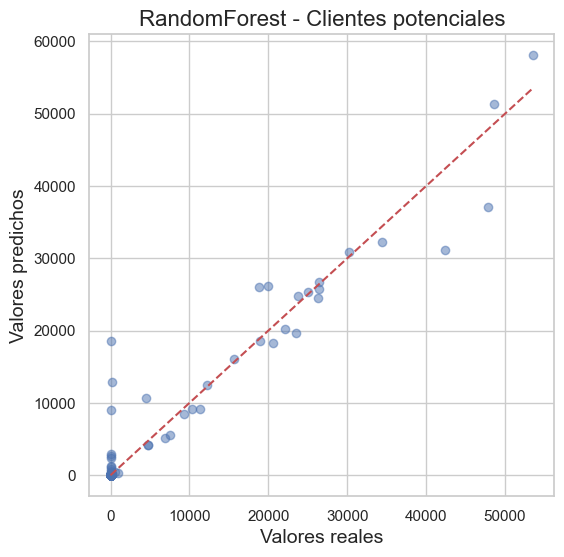

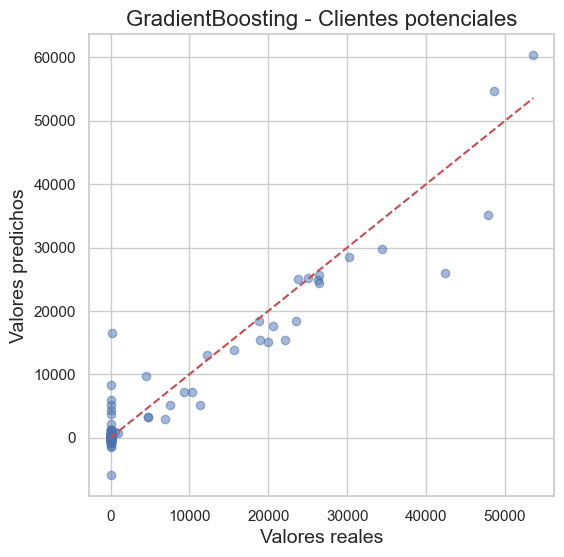

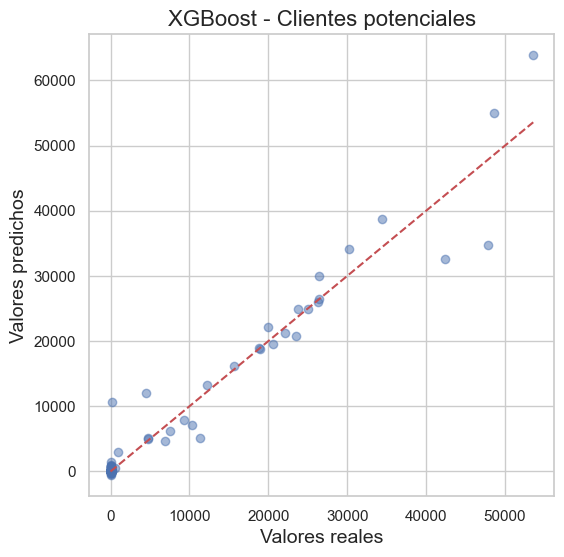

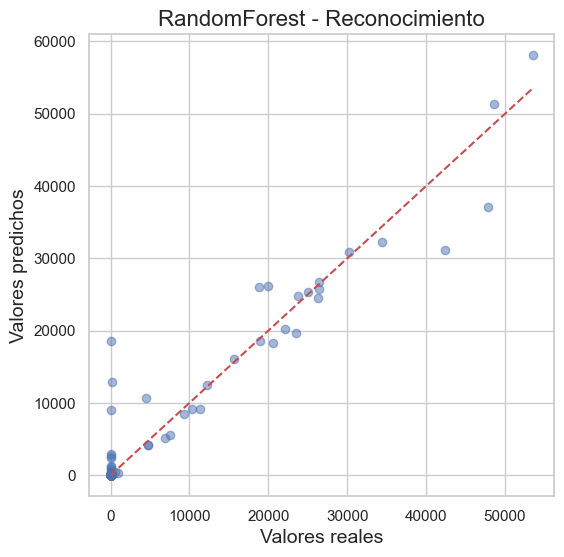

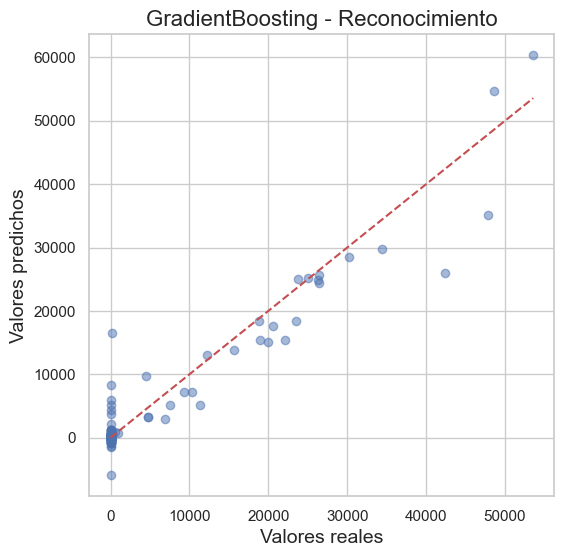

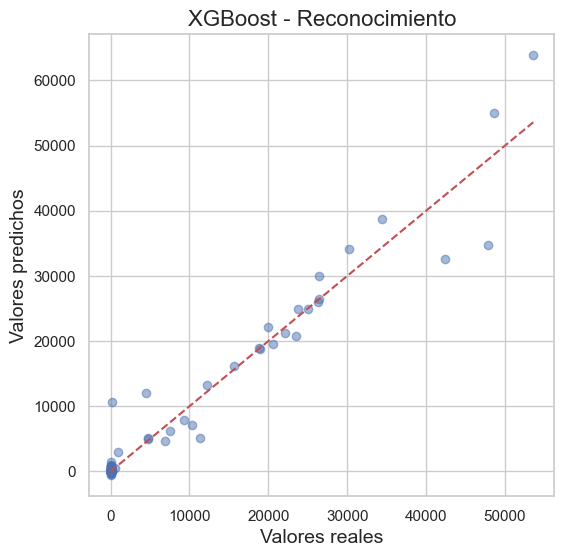

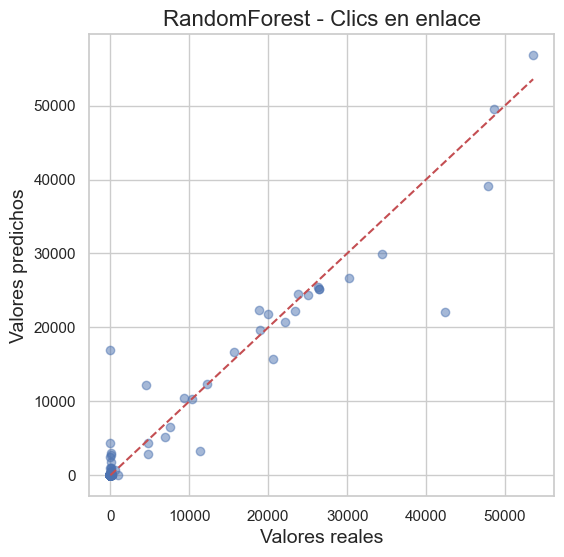

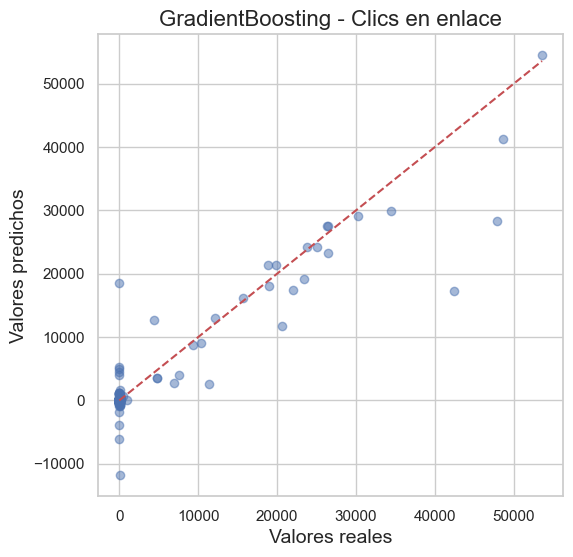

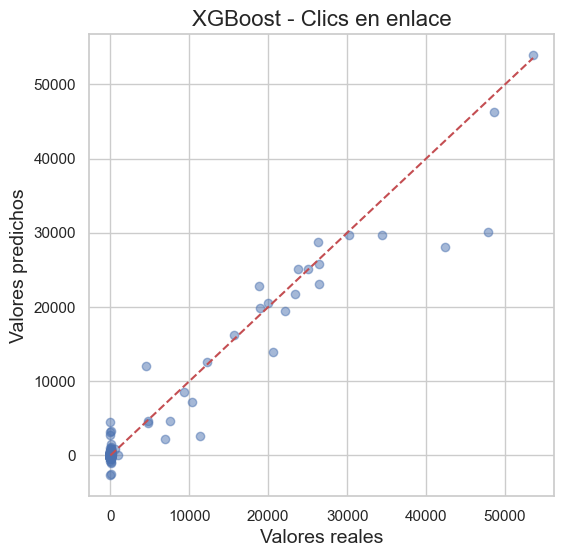

In [134]:
# ==============================
# Scatterplots para todos los objetivos y modelos
# ==============================
def scatterplots_todos(modelos_guardados):
    for obj, entrenados in modelos_guardados.items():
        for nombre, (modelo, X_test, y_test) in entrenados.items():
            y_pred = modelo.predict(X_test)

            plt.figure(figsize=(6,6))
            plt.scatter(y_test, y_pred, alpha=0.5)
            plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
            plt.xlabel("Valores reales")
            plt.ylabel("Valores predichos")
            plt.title(f"{nombre} - {obj}")
            plt.show()

# Ejecutar scatterplots
scatterplots_todos(modelos_guardados)

In [135]:
# Crear diccionario de resultados
resultados_globales = {
    "Clientes potenciales": evaluar_objetivo_avanzado("Clientes potenciales", df_meta)[0],  
    "Reconocimiento": evaluar_objetivo_avanzado("Reconocimiento", df_meta)[0],
    "Clics en enlace": evaluar_objetivo_avanzado("Clics en enlace", df_meta)[0]
}

# Ahora s√≠ construir la tabla comparativa
df_comparativa = mostrar_tabla_comparativa(resultados_globales)

display(df_comparativa)

NameError: name 'mostrar_tabla_comparativa' is not defined

### Comparaci√≥n de modelos lineales vs. modelos avanzados

#### Modelos lineales (Ridge, Lasso y Regresi√≥n Lineal)
Los resultados iniciales muestran un desempe√±o bastante bajo en todos los objetivos de campa√±a:

- **Clientes potenciales (Leads):** R¬≤ ‚âà 0.53 ‚Äì 0.54  
- **Reconocimiento:** R¬≤ ‚âà 0.53 ‚Äì 0.54  
- **Clics en enlace:** R¬≤ ‚âà 0.41 ‚Äì 0.43  

Esto indica que los modelos lineales apenas logran explicar entre el 40% y el 54% de la varianza de los resultados.  

**Posibles causas de este bajo desempe√±o:**
1. Relaciones **no lineales** entre las variables y los resultados.
2. **Multicolinealidad extrema** entre Importe gastado, Impresiones y Clics en el enlace.
3. **Sesgo y outliers** muy grandes que distorsionan los ajustes.
4. Diferencias de **escala en la variable objetivo** seg√∫n el tipo de campa√±a.
5. La **regularizaci√≥n** de Ridge y Lasso no es suficiente para capturar la complejidad de los datos.

---

#### Modelos avanzados (RandomForest, GradientBoosting y XGBoost)
En contraste, los modelos avanzados presentan una mejora dr√°stica:

- **Clientes potenciales y Reconocimiento:** R¬≤ entre **0.92 y 0.96**  
- **Clics en enlace:** R¬≤ entre **0.88 y 0.94**  

Adem√°s, los errores (RMSE y MAE) son considerablemente m√°s bajos que en los modelos lineales.  

**Razones de la mejora:**
1. Capturan **relaciones no lineales** y complejas.  
2. Son menos sensibles a **outliers**.  
3. Detectan autom√°ticamente **interacciones entre variables** (ej. inversi√≥n √ó mes).  
4. Aplican **regularizaci√≥n integrada**, lo que mejora la estabilidad y reduce sobreajuste.  

---

**Conclusi√≥n:**  
Los resultados confirman que las campa√±as de Meta Ads no pueden modelarse adecuadamente con m√©todos lineales simples, debido a la complejidad, la presencia de outliers y la fuerte multicolinealidad.  
En cambio, los modelos avanzados (basados en √°rboles y ensambles) logran capturar estas din√°micas con alta precisi√≥n, consolid√°ndose como las mejores opciones para predecir resultados y optimizar la inversi√≥n en campa√±as.

## Importancia de variables con Random Forest

En esta secci√≥n se utiliza un modelo de **RandomForestRegressor** para calcular la importancia de las variables en el objetivo **Clientes Potenciales**.  
El objetivo es identificar cu√°les variables aportan m√°s a la predicci√≥n de resultados.

In [ ]:
# ============================================
#  Importancia de variables
# ============================================

def importancia_variables(modelo, X_train, preprocessor):
    """
    Calcula la importancia de las variables en un modelo basado en √°rboles.
    Combina variables num√©ricas y categ√≥ricas transformadas.
    """
    # Recuperar nombres de columnas transformadas
    columnas_num = preprocessor.transformers_[0][2]  # variables num√©ricas originales
    columnas_cat = list(
        preprocessor.transformers_[1][1].get_feature_names_out(preprocessor.transformers_[1][2])
    )  # variables categ√≥ricas despu√©s del OneHotEncoding
    
    columnas_finales = columnas_num + columnas_cat

    # Importancia calculada por el modelo
    importancias = modelo.named_steps["model"].feature_importances_

    return pd.DataFrame({
        "Variable": columnas_finales,
        "Importancia": importancias
    }).sort_values(by="Importancia", ascending=False)


# Ejemplo: importancia de variables en Clientes Potenciales con RandomForest
pipe = Pipeline([
    ("preprocess", crear_preprocesador("Clientes potenciales")),
    ("model", RandomForestRegressor(random_state=42, n_estimators=200))
])

# Entrenar el modelo
pipe.fit(
    df_meta[vars_por_objetivo1["Clientes potenciales"]["numericas"] +
            vars_por_objetivo1["Clientes potenciales"]["categoricas"]],
    df_meta["Resultados"]
)

# Calcular importancias
importancias_rf = importancia_variables(pipe, df_meta, pipe.named_steps["preprocess"])
display(importancias_rf)

### Interpretaci√≥n de resultados de la importancia de variables

- **Importe gastado (COP)** es la variable con mayor peso (‚âà 40%), confirmando que la inversi√≥n es el factor m√°s determinante en los resultados.
- **Impresiones** ocupa el segundo lugar (‚âà 26%), lo cual es consistente, ya que a mayor exposici√≥n del anuncio, m√°s oportunidades de generar resultados.
- Las **llamadas a la acci√≥n (WATCH_MORE y LEARN_MORE)** tambi√©n muestran un peso importante, indicando que la elecci√≥n del CTA puede modificar significativamente la efectividad de la campa√±a.
- **Clics en el enlace** aporta menor relevancia de la esperada, sugiriendo que su efecto ya est√° capturado indirectamente por el gasto y las impresiones.
- Variables como **edad, sexo y mes** tienen importancias muy bajas (<1%), lo que indica que influyen poco en comparaci√≥n con las variables de inversi√≥n y exposici√≥n.

## Conclusi√≥n General del Proyecto

El an√°lisis realizado sobre las campa√±as de Meta Ads permiti√≥ identificar patrones clave en el comportamiento de las variables, as√≠ como evaluar el desempe√±o de diferentes modelos predictivos para explicar los resultados obtenidos.

### Principales hallazgos:
- **Dependencia de la inversi√≥n**: El **importe gastado** y las **impresiones** son los factores m√°s determinantes en el desempe√±o de las campa√±as. Esto refuerza la l√≥gica de que mayor inversi√≥n y visibilidad generan m√°s resultados.
- **Importancia del CTA**: Las **llamadas a la acci√≥n (WATCH_MORE y LEARN_MORE)** demostraron ser m√°s efectivas que otras, lo cual valida la necesidad de dise√±ar CTAs alineados con el objetivo de la campa√±a.
- **Segmentaci√≥n demogr√°fica**: Variables como **edad, sexo y mes** mostraron baja relevancia en los modelos, lo que sugiere que los resultados dependen m√°s de factores estructurales (presupuesto y exposici√≥n) que de segmentaciones demogr√°ficas.
- **Modelos predictivos**: Los modelos lineales (Ridge, Lasso y Regresi√≥n Lineal) tuvieron bajo desempe√±o (R¬≤ < 0.55), lo cual evidencia que no capturan adecuadamente la complejidad de los datos. En contraste, los modelos avanzados como **RandomForest y XGBoost** alcanzaron valores de R¬≤ superiores al 0.93, mostrando que los resultados son mejor explicados por relaciones no lineales y complejas entre variables.

### Limitaciones:
- **Sesgo temporal**: Los datos abarcan un periodo espec√≠fico y no contemplan campa√±as futuras, lo que limita la generalizaci√≥n de los resultados.
- **Multicolinealidad**: La alta correlaci√≥n entre inversi√≥n, impresiones y clics genera redundancia en la informaci√≥n, lo que puede distorsionar la interpretaci√≥n directa de algunas m√©tricas.
- **Datos de campa√±as excluidas**: Algunos objetivos como *Ventas* e *Interacci√≥n* se descartaron por falta de resultados, lo que limita el alcance a solo tres tipos de campa√±a.

### Recomendaciones:
1. **Optimizaci√≥n de presupuesto**: Priorizar la eficiencia del gasto y la generaci√≥n de impresiones como palancas clave de resultados.
2. **Refuerzo de CTAs efectivos**: Dise√±ar campa√±as con √©nfasis en botones como *WATCH_MORE* y *LEARN_MORE*, que demostraron mayor impacto.
3. **Monitoreo continuo**: Implementar un sistema de seguimiento con modelos avanzados (RandomForest o XGBoost) para anticipar resultados y ajustar en tiempo real.
4. **An√°lisis adicional**: Complementar este estudio con m√©tricas de calidad de los leads y tasa de conversi√≥n real, para vincular los resultados de Meta Ads con indicadores de negocio m√°s estrat√©gicos.

üìå **Conclusi√≥n final**:  
Las campa√±as de Meta Ads en este an√°lisis confirman que el desempe√±o se explica principalmente por el **nivel de inversi√≥n y la visibilidad alcanzada**, mientras que la segmentaci√≥n demogr√°fica tiene un papel secundario.  
El uso de modelos avanzados de machine learning ofrece una herramienta poderosa para predecir y optimizar resultados, apoyando la toma de decisiones estrat√©gicas en futuras campa√±as.